# 1. BUSINESS UNDERSTANDING

# 2. DATA UNDERSTANDING

## 2.1. Import Libraries

In [117]:
# ====== Data Handling ======
import pandas as pd
import numpy as np
import ast
from collections import Counter
import calendar

# ====== Visualization ======
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import contextily as ctx

# ====== Preprocessing ======
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, PowerTransformer, QuantileTransformer

# ====== Regression & Tree Models ======
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from scipy.stats import randint, uniform

# ====== Clustering ======
from sklearn.cluster import KMeans

# ====== Correlation & Statistics ======
from scipy.stats import pearsonr, spearmanr
from scipy.stats import skew, kurtosis

# ====== NLP ======
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bertopic import BERTopic

# ====== Geospatial ======
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from shapely.geometry import Point
from branca.element import Template, MacroElement, Element


# ====== Utilities ======
import warnings
warnings.filterwarnings("ignore")
import joblib
from joblib import dump
import pickle
import textwrap

# =================================================
from scipy.stats import randint, uniform

# ================Deployment==============
import streamlit as st

## 2.2. Loading the Datasets

In [2]:
future_calendar = pd.read_csv("data/future_calendar_rates.csv")
listings_data = pd.read_csv("data/listings_data.csv")
#listings = pd.read_csv("data/listings.csv")
past_calendar = pd.read_csv("data/past_calendar_rates.csv")
reviews = pd.read_csv("data/reviews_data.csv")

*Schema Listings Data*

|Variable     |Type       |Description
|------------|-----------|-------------------------------------------------------
|listing_id	    |long	    |Unique identifier for the listing
|listing_name	|string 	|Title of the listing
|listing_type	|string	    |Type of property (e.g., apartment, house, villa)
|room_type	    |string	    |Type of room (e.g., entire home, private room)
|cover_photo_url	|string	    |URL of the main listing photo
|photos_count	|integer	|Number of photos available for the listing
|host_id	    |long	    |Unique identifier for the host
|host_name	    |string	    |Name of the host
|cohost_ids	    |string	    |Ids of co-hosts associated with the listing
|cohost_names	|string	    |Names of co-hosts associated with the listing
|superhost	    |boolean     |Whether the host is a superhost
|country	    |string	    |Country where the listing is located
|state	        |string	    |State or province where the listing is located
|city	        |string	    |City where the listing is located
|latitude	    |decimal(10,4)	|Geographical latitude coordinate
|longitude	    |decimal(10,4)	|Geographical longitude coordinate
|guests	        |integer	|Maximum number of guests allowed
|bedrooms	    |integer	|Number of bedrooms available
|beds	        |integer	|Number of beds available
|baths	        |decimal(4,1)	|Number of bathrooms available
|registration	|boolean	|Indicates if the listing has a registration number
|amenities	    |string	    |List of amenities offered
|instant_book	|boolean	|Whether the listing can be booked instantly
|min_nights	    |integer	|Minimum number of nights required to book
|cancellation_policy	|string	|Type of cancellation policy offered
|currency	    |string	    |Currency used for pricing
|cleaning_fee	|integer	|The cleaning fee for the listing
|extra_guest_fee	|integer	|Fee for each extra guest
|num_reviews	    |integer	|Total number of reviews received
|rating_overall	    |double	    |Overall rating score
|rating_accuracy	|double	    |Rating score for listing accuracy
|rating_checkin	    |double	    |Rating score for check-in experience
|rating_cleanliness	|double	    |Rating score for cleanliness
|rating_communication	|double	|Rating score for host communication
|rating_location	|double	    |Rating score for location
|rating_value	    |double	    |Rating score for value
|ttm_revenue	    |double	    |Total revenue in trailing twelve months
|ttm_revenue_native	|double	    |Total revenue in native currency in trailing twelve months
|ttm_avg_rate	    |double	    |Average daily rate in trailing twelve months
|ttm_avg_rate_native	|double	|Average daily rate in native currency in trailing twelve months
|ttm_occupancy	    |double	    |Occupancy rate in trailing twelve months
|ttm_adjusted_occupancy	|double	|Adjusted occupancy rate in trailing twelve months, excluding owner-blocked days
|ttm_revpar	        |double	    |Revenue per available room (RevPAR) in trailing twelve months
|ttm_revpar_native	|double	    |Revenue per available room (RevPAR) in native currency in trailing twelve months
|ttm_adjusted_revpar	|double	    |Adjusted RevPAR in trailing twelve months
|ttm_adjusted_revpar_native	|double	    |Adjusted RevPAR in native currency in |trailing twelve months
|ttm_reserved_days	    |long	    |Number of booked/reserved days in trailing twelve months
|ttm_blocked_days	    |long	|Number of host-blocked days in trailing twelve months
|ttm_available_days	    |long	|Number of available days in trailing twelve months
|ttm_total_days	        |long	|Total number of days in trailing twelve months (reserved + available)
|l90d_revenue	    |double	    |Revenue in the last 90 days
|l90d_revenue_native	|double	    |Revenue in native currency in the last 90 days
|l90d_avg_rate	    |double	    |daily rate in the last 90 days
|l90d_avg_rate_native	|double	    |Average daily rate in native currency in the last 90 days
|l90d_occupancy	    |double	    |Occupancy rate in the last 90 days
|l90d_adjusted_occupancy	|double	    |Adjusted occupancy rate in the last 90 days
|l90d_revpar	|double	    |RevPAR in the last 90 days
|l90d_revpar_native	|double	    |RevPAR in native currency in the last 90 days
|l90d_adjusted_revpar	|double	|Adjusted RevPAR in the last 90 days
|l90d_adjusted_revpar_native	|double	    |Adjusted RevPAR in native currency in the last 90 days
|l90d_reserved_days	|long	|Number of reserved days in the last 90 days
|l90d_blocked_days	|long	|Number of blocked days in the last 90 days
|l90d_available_days	|long	|Number of available days in the last 90 days
|l90d_total_days	|long	|Total number of days considered in the last 90 days period


*schema past calendar rates*

|Variables  |Type	|Description
|-----------|--------|-------------------------------------------------
|listing_id	    |long	|Unique identifier for the listing
|date	    |date	|First day of the month for aggregated monthly data
|vacant_days	|integer	|Number of days the property was vacant
|reserved_days	|integer	|Number of days the property was reserved
|occupancy	|double	    |Occupancy rate
|revenue	|double	    |Total revenue generated during the month
|rate_avg	|double	    |Average daily rate
|booked_rate_avg	|double	    |Average rate when booked
|booking_lead_time_avg	|integer	|Average booking lead time in days
|length_of_stay_avg	    |integer	|Average length of stay in days
|min_nights_avg	    |integer	|Average minimum nights requirement
|native_booked_rate_avg	|double	|Average rate when booked in native currency
|native_rate_avg	|double	    |Average daily rate in native currency
|native_revenue	    |double	    |Revenue generated in native currency


*schema reviews data*

|Variables	|Type	|Description
|-----------|-------|------------------------------------------------------
|listing_id	|long	|Unique identifier for the listing
|date	    |date	|First day of the month when reviews were aggregated
|num_reviews	|long	|Number of reviews for the listing
|reviewers	|array<long>	|List of reviewer IDs


## 2.3. Dataset Examination
### 2.3.1 Checking the datasets columns and shape

In [3]:
datasets = {
    "future_calendar": future_calendar,
    "listings_data": listings_data,
    "past_calendar": past_calendar,
    "reviews": reviews
}

for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.to_list())
    
    


future_calendar:
Shape: (3480, 14)
Columns: ['listing_id', 'date', 'vacant_days', 'reserved_days', 'occupancy', 'revenue', 'rate_avg', 'booked_rate_avg', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'native_booked_rate_avg', 'native_rate_avg', 'native_revenue']

listings_data:
Shape: (300, 61)
Columns: ['listing_id', 'listing_name', 'listing_type', 'room_type', 'cover_photo_url', 'photos_count', 'host_id', 'host_name', 'cohost_ids', 'cohost_names', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms', 'beds', 'baths', 'registration', 'amenities', 'instant_book', 'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee', 'extra_guest_fee', 'num_reviews', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native', 'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy', 'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native', 'ttm_adjusted_r

### 2.3.2 Displaying the last 5 rows of each dataset

In [4]:
print("future_calendar")
future_calendar.tail()

future_calendar


listing_id        date  vacant_days  reserved_days  occupancy  revenue  \
3475     3956790  01/03/2026           31              0      0.000        0   
3476     3956790  01/05/2026           31              0      0.000        0   
3477    11976359  01/03/2026           31              0      0.000        0   
3478     3956790  01/10/2025           14             17      0.548      497   
3479     3956790  01/09/2025           19             11      0.367      321   

      rate_avg  booked_rate_avg  booking_lead_time_avg  length_of_stay_avg  \
3475      30.6              NaN                    NaN                 NaN   
3476      31.2              NaN                    NaN                 NaN   
3477      21.9              NaN                    NaN                 NaN   
3478      29.5             29.2                   45.0                 4.0   
3479      28.2             29.2                   46.0                10.0   

      min_nights_avg  native_booked_rate_avg  native_rate_avg  native_revenue  
3475             2.0                     NaN             3954               0  
3476             2.0                     NaN             4031               0  
3477             1.0                     NaN             2830               0  
3478             2.0                  3773.0             3812           64214  
3479             2.0                  3773.0             3644           41474

In [5]:
print("listings_data")
listings_data.tail()

listings_data


listing_id                                       listing_name  \
295    41725548                 Aoukings Place Home Away from Home   
296    41759384    Furnished & serviced 2 bed behind Junction Mall   
297    41817931               One bedroom apartment in  kileleshwa   
298    41818959                        Studio apartment in kileưwa   
299    41825730  A comfortable and classy property in a leafy area   

           listing_type    room_type  \
295  Entire rental unit  entire_home   
296  Entire rental unit  entire_home   
297  Entire rental unit  entire_home   
298  Entire rental unit  entire_home   
299   Entire guesthouse  entire_home   

                                       cover_photo_url  photos_count  \
295  https://a0.muscache.com/im/pictures/airflow/Ho...            27   
296  https://a0.muscache.com/im/pictures/82937564-7...            19   
297  https://a0.muscache.com/im/pictures/hosting/Ho...            35   
298  https://a0.muscache.com/im/pictures/d7ffacd4-e...            40   
299  https://a0.muscache.com/im/pictures/70af2d79-1...            10   

       host_id    host_name cohost_ids cohost_names  ...  l90d_occupancy  \
295  135314917  Aouki Padox        NaN          NaN  ...           0.289   
296  190480480       Wandia        NaN          NaN  ...           0.000   
297  308523342      Damaris  433517328        Nelly  ...           0.000   
298  308523342      Damaris  433517328        Nelly  ...           0.000   
299  330570443         Jane        NaN          NaN  ...           0.000   

     l90d_adjusted_occupancy  l90d_revpar  l90d_revpar_native  \
295                    0.382          6.3               815.4   
296                    0.000          0.0                 0.0   
297                    0.000          0.0                 0.0   
298                    0.000          0.0                 0.0   
299                    0.000          0.0                 0.0   

     l90d_adjusted_revpar  l90d_adjusted_revpar_native  l90d_reserved_days  \
295                   8.4                       1079.2                  26   
296                   0.0                          0.0                   0   
297                   0.0                          0.0                   0   
298                   0.0                          0.0                   0   
299                   0.0                          0.0                   0   

    l90d_blocked_days l90d_available_days l90d_total_days  
295                22                  64              90  
296                 0                  90              90  
297                30                  90              90  
298                27                  90              90  
299                 0                  90              90  

[5 rows x 61 columns]

In [6]:
print("past_calendar")
past_calendar.tail()

past_calendar


listing_id        date  vacant_days  reserved_days  occupancy  revenue  \
3537    34539707  01/11/2024           15             15      0.500      257   
3538    34539707  01/01/2025            6             25      0.806      367   
3539    34539707  01/04/2025           21              9      0.300      144   
3540    34539707  01/06/2025           22              8      0.267      131   
3541    34539707  01/09/2024           21              9      0.300      158   

      rate_avg  booked_rate_avg  booking_lead_time_avg  length_of_stay_avg  \
3537      16.7             17.1                    2.0                15.0   
3538      14.5             14.7                   10.0                 6.0   
3539      15.0             16.0                   10.0                 4.0   
3540      15.8             16.4                    5.0                 8.0   
3541      17.4             17.6                   29.0                 4.0   

      min_nights_avg  native_booked_rate_avg  native_rate_avg  native_revenue  
3537             NaN                  2206.0             2154           33153  
3538             2.0                  1899.0             1873           47405  
3539             2.0                  2072.0             1943           18648  
3540             2.0                  2119.0             2041           16926  
3541             NaN                  2274.0             2248           20410

In [7]:
print("reviews")
reviews.tail()

reviews


listing_id        date  num_reviews                          reviewers
992    38693256  01/02/2025            2             40,107,990,118,239,300
993    38693256  01/04/2025            3  4,791,628,773,071,280,000,000,000
994    13453034  01/03/2025            1                           12933466
995    13453034  01/12/2024            1                           21443423
996    39290226  01/10/2024            2            135,349,052,277,424,000

### 2.3.3 Data types, Summary Statistics, Missing & Unique Values for the datasets

In [8]:
# Function to check the data type, summary statistics, missing and unique values
def datatypes_summary(df):
    dtypes_summary = pd.DataFrame({
        'Column': df.columns,
        'Data Type': df.dtypes,
        'Non-null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum(),
        'Unique Values': df.nunique().values,
        'Missing %': (df.isnull().sum()/len(df)*100).round(2).values,
        #'Most Common Data Type': df.dtypes.value_counts().idxmax()
    })
    
    # Describe stats (numerical + categorical + datetime)
    stats = df.describe(include='all').transpose()
    stats = stats.reset_index().rename(columns={'index': 'Column'})
    
    #picking trimmed subset of describe stats
    keep_cols = ['Column', 'mean', 'std', 'min', '25%', '50%', 'max', 'top', 'freq']
    stats = stats[[c for c in keep_cols if c in stats.columns]]
    
    # merge summaries
    merged = pd.merge(dtypes_summary, stats, on="Column", how="left")
    
    return merged



In [9]:
# ========================================
# Check data type per data set
# =========================================

print("🔹Future Calendar Data Types:")
display(datatypes_summary(future_calendar))

print("\n 🔹 Listings Data Types")
display(datatypes_summary(listings_data))

print("\n 🔹 Past Calender Data Types:")
display(datatypes_summary(past_calendar))

print("\n 🔹 Reviews Data Types")
display(datatypes_summary(reviews))

🔹Future Calendar Data Types:


Column Data Type  Non-null Count  Null Count  \
0               listing_id     int64            3480           0   
1                     date    object            3480           0   
2              vacant_days     int64            3480           0   
3            reserved_days     int64            3480           0   
4                occupancy   float64            3480           0   
5                  revenue     int64            3480           0   
6                 rate_avg   float64            3480           0   
7          booked_rate_avg   float64             389        3091   
8    booking_lead_time_avg   float64             243        3237   
9       length_of_stay_avg   float64             243        3237   
10          min_nights_avg   float64            3283         197   
11  native_booked_rate_avg   float64             389        3091   
12         native_rate_avg     int64            3480           0   
13          native_revenue     int64            3480           0   

    Unique Values  Missing %             mean              std       min  \
0             290       0.00  27742328.955172  11666504.832148  471581.0   
1              12       0.00              NaN              NaN       NaN   
2              31       0.00        28.672414         6.310099       0.0   
3              30       0.00         1.744253         6.241024       0.0   
4              59       0.00         0.057449         0.205619       0.0   
5             352       0.00       100.619828       395.483759       0.0   
6            1033       0.00        57.618218        49.135821       9.6   
7             302      88.82        73.882005        92.313188       9.9   
8             159      93.02       124.893004        93.435027       1.0   
9              49      93.02        18.255144        36.608278       1.0   
10             10       5.66         2.353945         4.238355       1.0   
11            302      88.82       9545.81491     11927.191334    1279.0   
12           1033       0.00      7444.483333      6348.519325    1240.0   
13            352       0.00     13000.441379     51097.914151       0.0   

           25%         50%         max         top freq  
0   19581431.0  30534791.0  41825730.0         NaN  NaN  
1          NaN         NaN         NaN  01/11/2025  290  
2         30.0        31.0        31.0         NaN  NaN  
3          0.0         0.0        31.0         NaN  NaN  
4          0.0         0.0         1.0         NaN  NaN  
5          0.0         0.0      7696.0         NaN  NaN  
6       33.175        48.5       655.0         NaN  NaN  
7         36.0        51.6       650.3         NaN  NaN  
8         45.0       111.0       373.0         NaN  NaN  
9          2.0         5.0       239.0         NaN  NaN  
10         1.0         1.0        31.0         NaN  NaN  
11      4651.0      6667.0     84021.0         NaN  NaN  
12     4286.75      6266.0     84628.0         NaN  NaN  
13         0.0         0.0    994351.0         NaN  NaN


 🔹 Listings Data Types


Column Data Type  Non-null Count  Null Count  \
0                    listing_id     int64             300           0   
1                  listing_name    object             300           0   
2                  listing_type    object             300           0   
3                     room_type    object             300           0   
4               cover_photo_url    object             300           0   
..                          ...       ...             ...         ...   
56  l90d_adjusted_revpar_native   float64             300           0   
57           l90d_reserved_days     int64             300           0   
58            l90d_blocked_days     int64             300           0   
59          l90d_available_days     int64             300           0   
60              l90d_total_days     int64             300           0   

    Unique Values  Missing %         mean              std       min  \
0             300        0.0  27654000.57  11685284.945291  471581.0   
1             299        0.0          NaN              NaN       NaN   
2              29        0.0          NaN              NaN       NaN   
3               3        0.0          NaN              NaN       NaN   
4             298        0.0          NaN              NaN       NaN   
..            ...        ...          ...              ...       ...   
56             81        0.0   598.296667       1431.24471       0.0   
57             59        0.0        14.98        18.517088       0.0   
58             52        0.0        12.76        22.581308       0.0   
59             59        0.0        75.02        18.517088       5.0   
60              1        0.0         90.0              0.0      90.0   

            25%         50%         max  \
0   19541569.25  30285731.0  41825730.0   
1           NaN         NaN         NaN   
2           NaN         NaN         NaN   
3           NaN         NaN         NaN   
4           NaN         NaN         NaN   
..          ...         ...         ...   
56          0.0         0.0      9809.4   
57          0.0         7.0        85.0   
58          0.0         0.0        90.0   
59         68.0        83.0        90.0   
60         90.0        90.0        90.0   

                                                  top freq  
0                                                 NaN  NaN  
1                   Bonsai Villa - Standard King Room    2  
2                                  Entire rental unit  128  
3                                         entire_home  252  
4   https://a0.muscache.com/im/pictures/7a748e4f-d...    3  
..                                                ...  ...  
56                                                NaN  NaN  
57                                                NaN  NaN  
58                                                NaN  NaN  
59                                                NaN  NaN  
60                                                NaN  NaN  

[61 rows x 14 columns]


 🔹 Past Calender Data Types:


Column Data Type  Non-null Count  Null Count  \
0               listing_id     int64            3542           0   
1                     date    object            3542           0   
2              vacant_days     int64            3542           0   
3            reserved_days     int64            3542           0   
4                occupancy   float64            3542           0   
5                  revenue     int64            3542           0   
6                 rate_avg   float64            3542           0   
7          booked_rate_avg   float64            1875        1667   
8    booking_lead_time_avg   float64            1668        1874   
9       length_of_stay_avg   float64            1668        1874   
10          min_nights_avg   float64            2380        1162   
11  native_booked_rate_avg   float64            1875        1667   
12         native_rate_avg     int64            3542           0   
13          native_revenue     int64            3542           0   

    Unique Values  Missing %            mean              std       min  \
0             300       0.00  27698186.96725  11679046.008305  471581.0   
1              12       0.00             NaN              NaN       NaN   
2              32       0.00       24.111801         8.779706       0.0   
3              32       0.00        6.302654         8.745056       0.0   
4              87       0.00        0.207335         0.287834       0.0   
5            1043       0.00      350.712592       759.855315       0.0   
6            1061       0.00       56.302061        52.971477       8.7   
7             822      47.06         57.1528        58.755585       9.0   
8             169      52.91       27.218825         44.23383       1.0   
9              58      52.91        8.058153         9.810054       1.0   
10             15      32.81        2.352941         4.175104       1.0   
11           1468      47.06     7384.485333      7589.300628    1163.0   
12           2368       0.00     7274.477132        6844.2532    1124.0   
13           1681       0.00    45314.456804     98140.055884       0.0   

           25%         50%         max         top freq  
0   19581431.0  30308601.0  41825730.0         NaN  NaN  
1          NaN         NaN         NaN  01/12/2024  299  
2         20.0        28.0        31.0         NaN  NaN  
3          0.0         1.0        31.0         NaN  NaN  
4          0.0       0.033         1.0         NaN  NaN  
5          0.0        54.5     18203.0         NaN  NaN  
6         31.4        46.7       791.5         NaN  NaN  
7        31.45        46.0       774.8         NaN  NaN  
8          1.0        11.0       352.0         NaN  NaN  
9          2.0         5.0        97.0         NaN  NaN  
10         1.0         1.0        31.0         NaN  NaN  
11      4059.0      5955.0    100088.0         NaN  NaN  
12     4056.25      6045.5    102246.0         NaN  NaN  
13         0.0      7057.5   2348193.0         NaN  NaN


 🔹 Reviews Data Types


Column Data Type  Non-null Count  Null Count  Unique Values  \
0   listing_id     int64             997           0            242   
1         date    object             997           0             12   
2  num_reviews     int64             997           0             10   
3    reviewers    object             997           0            975   

   Missing %             mean              std       min         25%  \
0        0.0  27924462.058175  11545800.209521  471581.0  20040341.0   
1        0.0              NaN              NaN       NaN         NaN   
2        0.0         1.673019         1.150085       1.0         1.0   
3        0.0              NaN              NaN       NaN         NaN   

          50%         max         top freq  
0  31922701.0  41825730.0         NaN  NaN  
1         NaN         NaN  01/12/2024  112  
2         1.0        12.0         NaN  NaN  
3         NaN         NaN   104220019    3

## 2.4 Data Cleaning 

1. **Remove duplicate:** Ensure each row is unique

2. **Handle Missing Values:**
    * Categorical/text columns → Fill with "Unknown" and standardize text
    * Numerical Columns → Fill with median value
    * Date Columns → Fill with the earliest date

3. Convert Data Types:
    * Columns containing "date" → Convert to datetime format
    * Numeric looking strings → Convert to numeric type where possible

The function is applied to all datasets (i.e. future_calendar, listings_data, past_calendar, and reviews) to standardize and prepare them for analysis 

In [10]:
# ==============
# Data Cleaning
# ===============

def clean_df(df, dataset_name):
    print(f"\n🔹Cleaning {dataset_name}...")
    
    #print("\n--- Before Cleaning ---")
    #display(datatypes_summary(df))
    
    # 1. Remove duplicates
    df = df.drop_duplicates()
    print(f"Removed duplicates → New shape: {df.shape}")
    
    # 2. Handling missing values
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = (
                df[col]
                .fillna("Unknown")
                .astype(str)
                .str.strip()
                .str.lower()
                .str.replace(r"\s+", " ", regex=True)
            )
        elif pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].fillna(df[col].min())
            
    # 3. Convert data types
    for col in df.columns:
        # Convert object columns that look like dates
        if "date" in col.lower() or pd.api.types.is_datetime64_dtype(df[col]):
                converted = pd.to_datetime(df[col], errors="coerce")
                if converted.notnull().sum() > 0: # only replace if some values converted
                    df[col] = converted
                    
        # Convert numeric looking strings
        if df[col].dtype == 'object':
            converted = pd.to_numeric(df[col], errors="coerce")
            if converted.notnull().sum() > 0:
                df[col] = converted.fillna(df[col])
                
    print(f"Finished cleaning {dataset_name}.")
    #print(f"Remaining nulls: {df.isnull().sum()} total") 
    
    #print("\n--- After Cleaning ---")
    return df         

In [11]:
# Applying cleaning function to each dataset
future_calendar = clean_df(future_calendar, "Future Calendar")
listings_data = clean_df(listings_data, "Listings")
past_calendar = clean_df(past_calendar, "Past Calendar")
reviews = clean_df(reviews, "Reviews")


🔹Cleaning Future Calendar...
Removed duplicates → New shape: (3480, 14)
Finished cleaning Future Calendar.

🔹Cleaning Listings...
Removed duplicates → New shape: (300, 61)
Finished cleaning Listings.

🔹Cleaning Past Calendar...
Removed duplicates → New shape: (3542, 14)
Finished cleaning Past Calendar.

🔹Cleaning Reviews...
Removed duplicates → New shape: (997, 4)
Finished cleaning Reviews.


## 2.5 Merge the Data

1. **Merge reviews into listings:**
    - `listings_data` is joined with `reviews` on `listing_id` using a left join to keep all listings

2. **Combine Past and Future calendars:**
    - `past_calendar` and `future_calendar` are concatenated vertically to form a complete calendar dataset

3. **Merge calendar with listings and reviews:**
    - The combined calendar is merged with `listings_reviews` on `listing_id` using a left join to create `master_df`

In [12]:
# 1. Merge reviews into listings
listings_reviews = listings_data.merge(reviews, on="listing_id", how="left")

# 2. Combine Past and Future calendars
calendar_all = pd.concat([past_calendar, future_calendar], axis=0) 

# 3. Merge calendar with listings and reviews
master_df = listings_reviews.merge(calendar_all, on="listing_id", how="left")

#4. Check result
print("Master dataset shape:", master_df.shape)
print("Master dataset columns:", master_df.columns.tolist())

Master dataset shape: (25117, 77)
Master dataset columns: ['listing_id', 'listing_name', 'listing_type', 'room_type', 'cover_photo_url', 'photos_count', 'host_id', 'host_name', 'cohost_ids', 'cohost_names', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms', 'beds', 'baths', 'registration', 'amenities', 'instant_book', 'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee', 'extra_guest_fee', 'num_reviews_x', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native', 'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy', 'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native', 'ttm_adjusted_revpar', 'ttm_adjusted_revpar_native', 'ttm_reserved_days', 'ttm_blocked_days', 'ttm_available_days', 'ttm_total_days', 'l90d_revenue', 'l90d_revenue_native', 'l90d_avg_rate', 'l90d_avg_rate_native', 'l90d_occupancy', 'l90d_adjusted_occupancy', 'l90d_revpar', 'l90d_

# 3. EXPLORATORY DATA ANALYSIS

## 3.1 Univariate Analysis


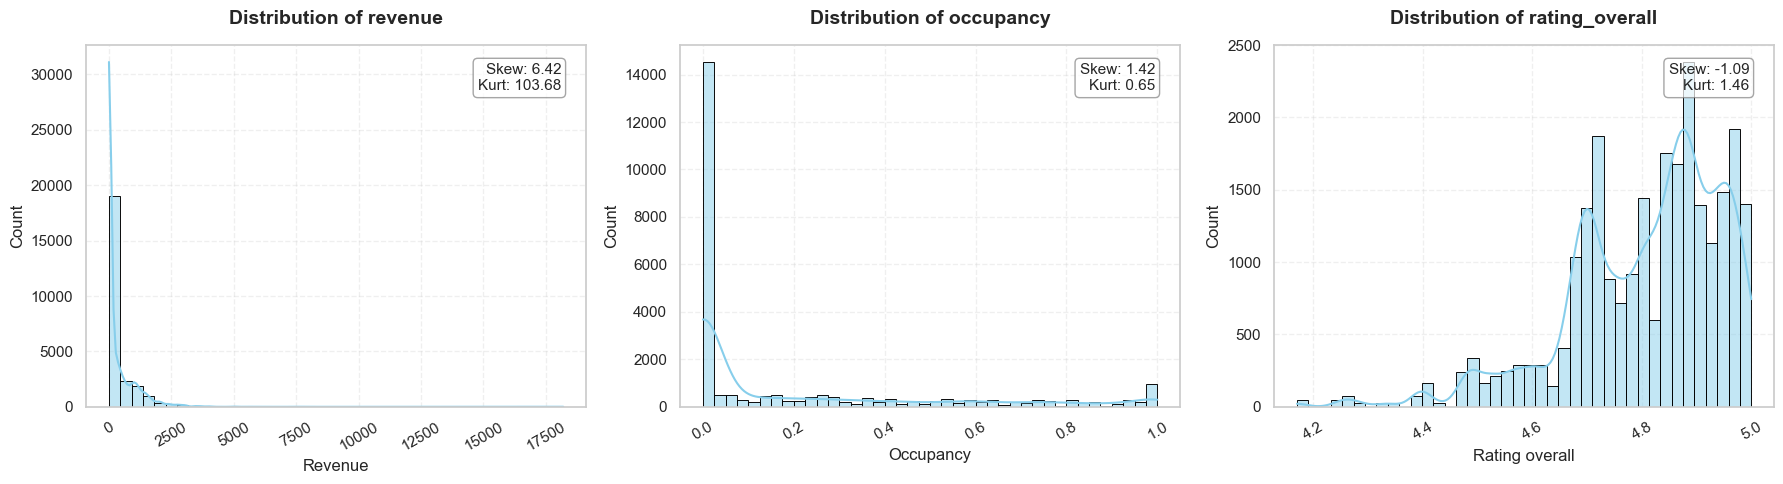

<Figure size 640x480 with 0 Axes>

In [13]:
sns.set_theme(style="whitegrid")
num_cols = ["revenue", "occupancy", "rating_overall"]

#plot in groups of three
for i in range (0, len(num_cols), 3):
    cols_subset = num_cols[i:i+3]
    fig, axes = plt.subplots(1, len(cols_subset), figsize=(6*len(cols_subset), 5))
    
    if len(cols_subset) == 1:
        axes = [axes] # makes iterable if only one subplot
        
    #plot each numeric column
    for ax, col in zip(axes, cols_subset):
        data = master_df[col].dropna()
        
        #plot histogram with KDE 
        sns.histplot(
            master_df[col].dropna(),
            kde=True, bins=40,
            color="skyblue", edgecolor="black",
            ax=ax
        )
        ax.set_title(f"Distribution of {col}", fontsize=14, fontweight="bold", pad=15)
        ax.set_xlabel(col.replace("_", " ").capitalize(), fontsize=12)
        ax.set_ylabel("Count", fontsize=12)
        ax.tick_params(axis="x", rotation=30)
        ax.grid(alpha=0.3, linestyle="--")
        
        # Compute skewness & kurtosis
        skew_val = skew(data)
        kurt_val = kurtosis(data)
        
        # Decide box color
        if abs(skew_val) > 1 or kurt_val > 3:
            box_color = dict(boxstyle="round,pad=0.3", fc="mistyrose", ec="red", alpha=0.8)
        else:
            box_color = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7)
        
        # Add annotation inside the plot (top right corner)
        ax.text(
            0.95, 0.95,
            f"Skew: {skew_val:.2f}\nKurt: {kurt_val:.2f}",
            transform=ax.transAxes,
            fontsize=11,
            fontweight="medium",
            va="top", ha="right",
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7)
        )
    
    plt.tight_layout()
    plt.show()
    
    plt.savefig("./images/univariate_analysis.jpeg", format="jpeg", dpi=300)
        

- **Revenue:** Most properties generate very low revenue, with a few high-revenue outliers. The distribution is **right-skewed** with a long tail.  

- **Occupancy:** Many properties have low or zero occupancy, while a smaller number have high occupancy. The distribution is **left-skewed**, with most values near zero.  

- **Overall Rating:** Most properties are rated very highly (4.5–5.0), with peaks at 5.0 and other high scores. The distribution is **right-skewed** and **multimodal**, with very few low ratings.

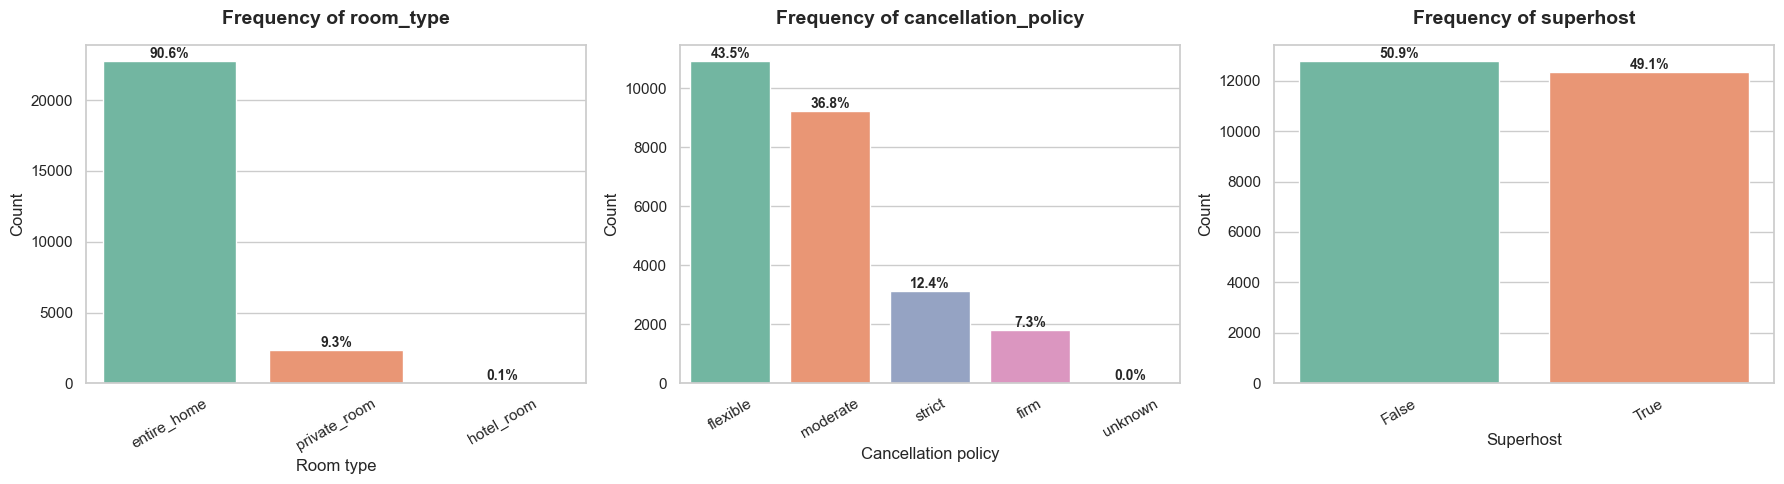

<Figure size 640x480 with 0 Axes>

In [14]:
cat_cols = ["room_type", "cancellation_policy", "superhost"]

for i in range(0, len(cat_cols), 3):
    cols_subset = cat_cols[i:i+3]
    fig, axes = plt.subplots(1, len(cols_subset), figsize=(6*len(cols_subset), 5))
    
    if len(cols_subset) == 1:
        axes = [axes]
    
    for ax, col in zip(axes, cols_subset):
        sns.countplot(
            data=master_df,
            x=col,
            order=master_df[col].value_counts().index,
            palette="Set2",
            ax=ax
        )

        total = len(master_df[col])
        for p in ax.patches:
            percentage = f"{100 * p.get_height() / total:.1f}%"
            ax.annotate(percentage, 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, fontweight="bold")

        ax.set_title(f"Frequency of {col}", fontsize=14, fontweight="bold", pad=15)
        ax.set_xlabel(col.replace("_", " ").capitalize(), fontsize=12)
        ax.set_ylabel("Count", fontsize=12)
        ax.tick_params(axis='x', rotation=30)
    
    plt.tight_layout()
    plt.show()
    
    plt.savefig("./images/univariate_analysis_1.jpeg", format="jpeg", dpi=300)

- **Room Type:** Most listings are **entire homes/apartments (90.6%)**, followed by **private rooms (9.3%)**, with **hotel rooms** being rare (0.1%).  

- **Cancellation Policy:** **Flexible (43.5%)** and **moderate (36.8%)** policies dominate, while stricter policies (**strict 12.4%, firm 7.3%**) are less common.  

- **Superhost Status:** Listings are nearly evenly split between **superhosts (49.1%)** and **non-superhosts (50.9%)**.


## 3.2 Bivariate Analysis

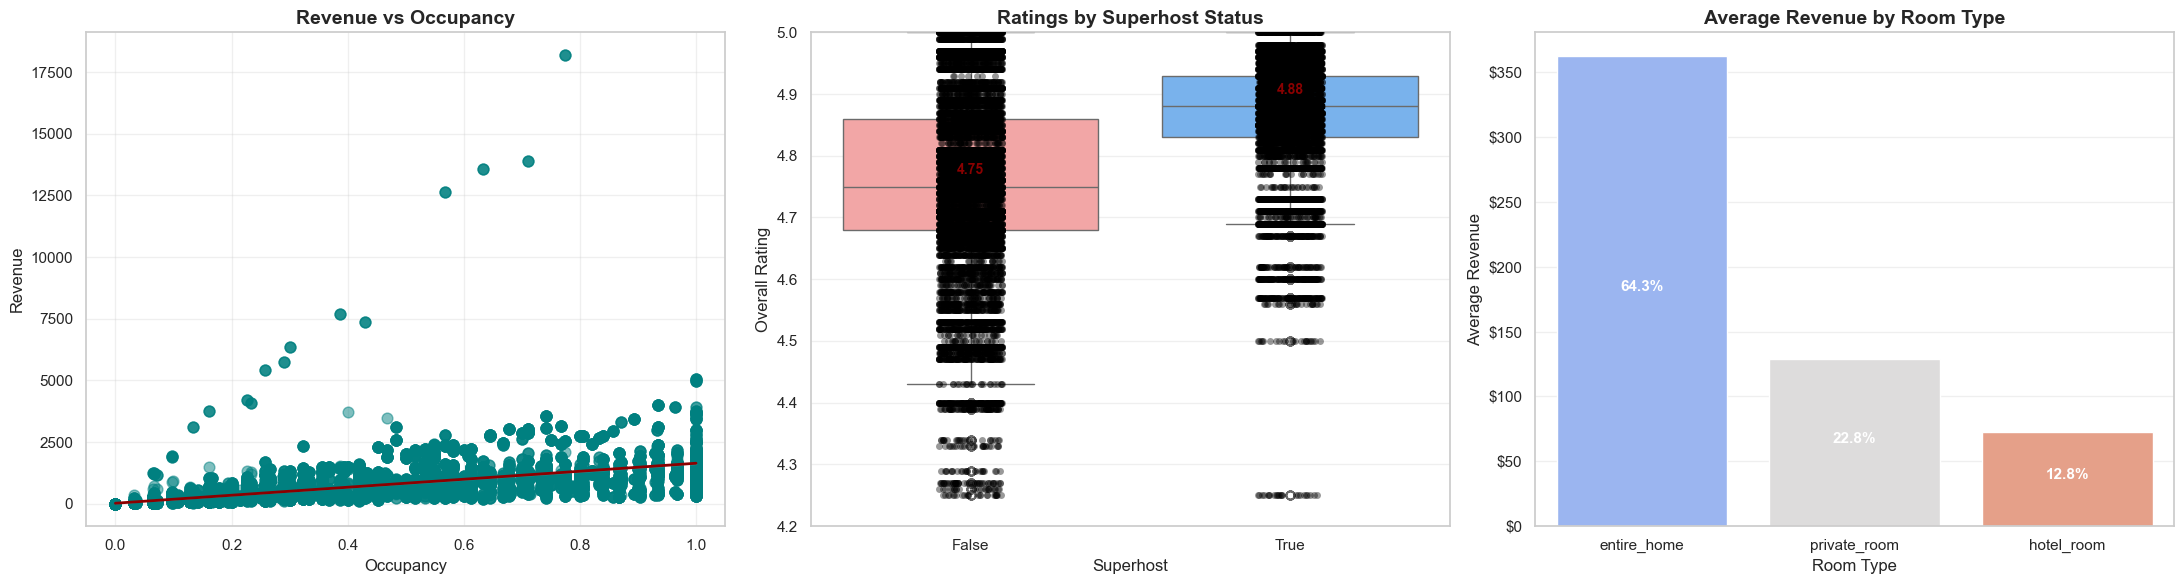

<Figure size 640x480 with 0 Axes>

In [15]:
# Set style
sns.set_style("whitegrid")
palette_scatter = "teal"
palette_box = ["#FF9999", "#66B2FF"]
palette_bar = "coolwarm"

# Compute average revenue by room type
room_avg = master_df.groupby("room_type")["revenue"].mean().reset_index()
total_avg_revenue = room_avg["revenue"].sum()
room_avg["pct"] = room_avg["revenue"] / total_avg_revenue * 100

# ✅ Sort room types by revenue (descending)
room_avg = room_avg.sort_values("revenue", ascending=False).reset_index(drop=True)

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(22,6))

# ----------------------------
# 1. Revenue vs Occupancy (Scatter + Trendline)
# ----------------------------
sns.regplot(
    data=master_df, 
    x="occupancy", 
    y="revenue", 
    scatter_kws={"alpha":0.5, "s":60, "color":palette_scatter},
    line_kws={"color":"darkred", "lw":2},
    ax=axes[0]
)
axes[0].set_title("Revenue vs Occupancy", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Occupancy")
axes[0].set_ylabel("Revenue")
axes[0].grid(alpha=0.3)

# ----------------------------
# 2. Ratings vs Superhost (Box + Stripplot)
# ----------------------------
sns.boxplot(
    data=master_df, 
    x="superhost", 
    y="rating_overall", 
    palette=palette_box,
    ax=axes[1]
)
sns.stripplot(
    data=master_df, 
    x="superhost", 
    y="rating_overall", 
    color="black", alpha=0.4, jitter=True,
    ax=axes[1]
)
axes[1].set_title("Ratings by Superhost Status", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Superhost")
axes[1].set_ylabel("Overall Rating")
axes[1].set_ylim(4.2, 5)  
axes[1].grid(axis="y", alpha=0.3)

# Add median labels
medians = master_df.groupby("superhost")["rating_overall"].median()
for idx, median in enumerate(medians):
    axes[1].text(idx, median+0.02, f"{median:.2f}", 
                 ha="center", fontsize=10, fontweight="bold", color="darkred")

# ----------------------------
# 3. Room Type vs Average Revenue (Bar Plot + %)
# ----------------------------
sns.barplot(
    data=room_avg, 
    x="room_type", 
    y="revenue", 
    palette=palette_bar,
    ax=axes[2],
    order=room_avg["room_type"]  # ✅ enforce sorted order
)
axes[2].set_title("Average Revenue by Room Type", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Room Type")
axes[2].set_ylabel("Average Revenue")
axes[2].yaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))  # Currency format
axes[2].grid(axis="y", alpha=0.3)

# Annotate percentages inside bars
for idx, row in room_avg.iterrows():
    axes[2].text(
        idx, row["revenue"]*0.5,  # middle of bar
        f"{row['pct']:.1f}%", 
        ha="center", color="white",
        fontsize=11, fontweight="bold"
    )

# ----------------------------
# Adjust layout and show
# ----------------------------
plt.tight_layout()
plt.show()

plt.savefig("./images/bivariate_analysis.jpeg", format="jpeg", dpi=300)

- **Revenue vs Occupancy:** Scatter plot shows a **positive correlation**—higher occupancy generally leads to higher revenue, though there are outliers and variability at lower occupancy levels.  

- **Ratings by Superhost Status:** Box plot indicates **superhosts** have higher median ratings and overall better ratings than non-superhosts.  

- **Average Revenue by Room Type:** Bar chart shows **entire homes** generate the most revenue (64.3%), followed by **private rooms (22.8%)**, with **hotel rooms** earning the least (12.8%).


## 3.3 Time-Based Analysis

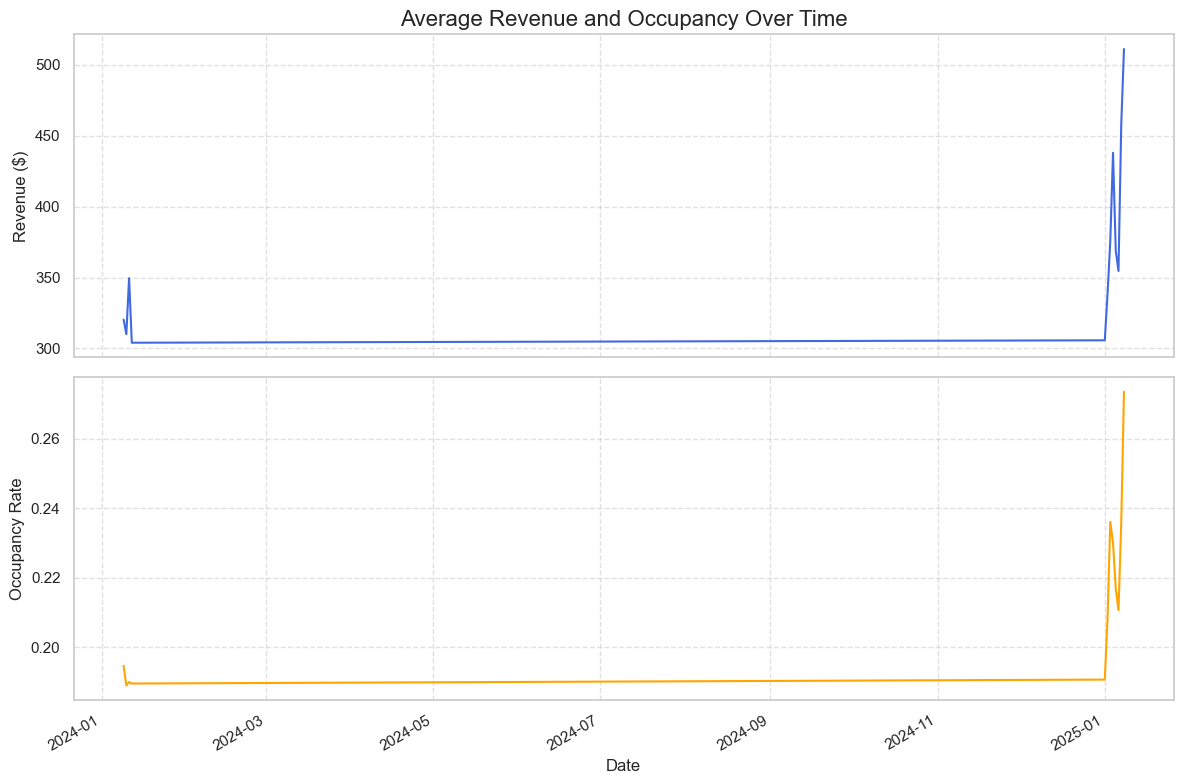

<Figure size 640x480 with 0 Axes>

In [16]:
# Create a figure with two subplots that share the same x-axis
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
daily_summary = master_df.groupby("date_x")[["revenue", "occupancy"]].mean()

# Plot Average Revenue
daily_summary['revenue'].plot(ax=ax[0], color='royalblue')
ax[0].set_title('Average Revenue and Occupancy Over Time', fontsize=16)
ax[0].set_ylabel('Revenue ($)', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)

# Plot Average Occupancy
daily_summary['occupancy'].plot(ax=ax[1], color='orange')
ax[1].set_ylabel('Occupancy Rate', fontsize=12)
ax[1].set_xlabel('Date', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

plt.savefig("./images/average_revenue_occupancy.jpeg", format="jpeg", dpi=300)

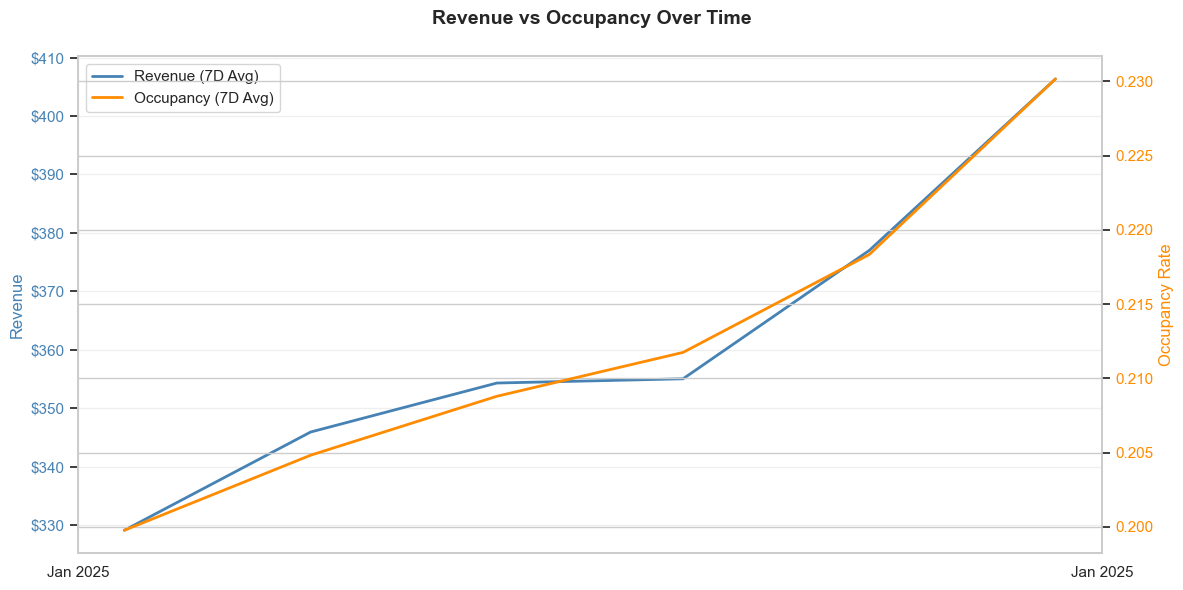

<Figure size 640x480 with 0 Axes>

In [17]:
# Ensure datetime
master_df["date_x"] = pd.to_datetime(master_df["date_x"], errors='coerce')

# Sort and group by date
daily_stats = master_df.groupby("date_x")[["revenue", "occupancy"]].mean().sort_index()

# Rolling averages (7-day smoothing)
daily_stats["revenue_smooth"] = daily_stats["revenue"].rolling(7).mean()
daily_stats["occupancy_smooth"] = daily_stats["occupancy"].rolling(7).mean()

# ---------------- Dual-axis Plot ----------------
fig, ax1 = plt.subplots(figsize=(12,6))

# Revenue (left axis)
ax1.plot(daily_stats.index, daily_stats["revenue_smooth"], color="steelblue", lw=2, label="Revenue (7D Avg)")
ax1.set_ylabel("Revenue", color="steelblue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="steelblue")
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))
ax1.grid(alpha=0.3)

# Occupancy (right axis)
ax2 = ax1.twinx()
ax2.plot(daily_stats.index, daily_stats["occupancy_smooth"], color="darkorange", lw=2, label="Occupancy (7D Avg)")
ax2.set_ylabel("Occupancy Rate", color="darkorange", fontsize=12)
ax2.tick_params(axis="y", labelcolor="darkorange")

# Title & formatting
fig.suptitle("Revenue vs Occupancy Over Time", fontsize=14, fontweight="bold")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

plt.savefig("./images/revenue_occupancy_overtime.jpeg", format="jpeg", dpi=300)

- **Average Revenue:** Fluctuating but generally increasing. Lowest in **Dec 2024 (~300)**, gradually rising to **425 in Apr 2025**, and peaking in **Aug 2025 (>500)**.  

- **Average Occupancy:** Mirrors revenue trends. Low and stable (~20%) from Sep 2024 to Jan 2025, rising to **24% in Mar 2025**, and peaking at **26% in Aug 2025**.  

- **Overall Trend:** Both metrics show a **seasonal pattern**, with highest performance in **summer months (July–August 2025)**. Revenue shows a stronger upward trend, suggesting higher earnings per occupied unit during peak season.


## 3.4 Correlation Analysis

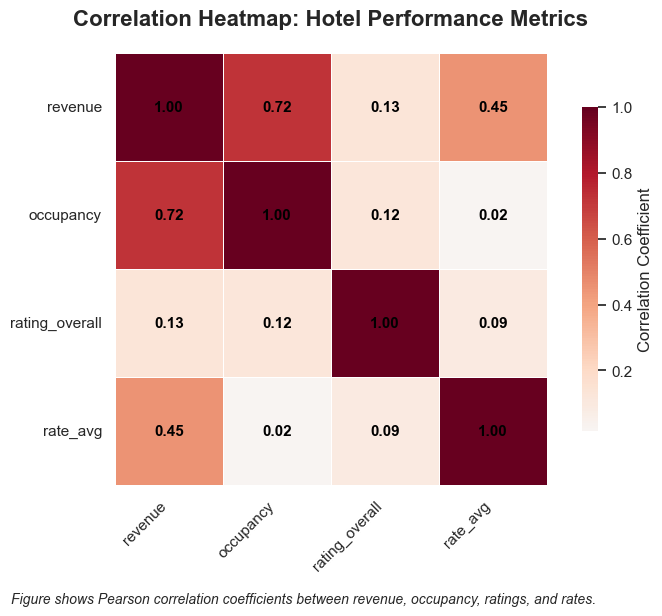

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(8, 6))

# Create the correlation matrix
corr_matrix = master_df[["revenue", "occupancy", "rating_overall", "rate_avg"]].corr()

# Heatmap with refined styling
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="RdBu_r",
    fmt=".2f",
    center=0,
    square=True,
    linewidths=0.7,
    linecolor='white',
    cbar_kws={
        "shrink": 0.75,
        "label": "Correlation Coefficient"
    },
    annot_kws={"size": 11, "weight": "bold", "color": "black"}
)

# Title and axis labels
plt.title("Correlation Heatmap: Hotel Performance Metrics", 
          fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# Layout adjustments
plt.tight_layout()

# Caption
plt.figtext(
    0.5, -0.02,
    "Figure shows Pearson correlation coefficients between revenue, occupancy, ratings, and rates.",
    ha="center", fontsize=10, style="italic", wrap=True
)

plt.show()

plt.savefig("./images/correlation_heatmap.jpeg", format="jpeg", dpi=300)

- **Revenue & Occupancy (0.72):** Strong positive correlation; higher occupancy generally leads to higher revenue.  
- **Revenue & Average Rate (0.45):** Moderate positive correlation; increasing average price can raise revenue, but less strongly than occupancy.  
- **Occupancy & Average Rate (~0):** No linear correlation; changes in price have little linear effect on occupancy.  
- **Overall Rating & Other Variables:** Very weak correlations (revenue: 0.13, occupancy: ~0); ratings do not strongly impact revenue or occupancy.


## 3.5 Geospatial Analysis

In [19]:
# Drop rows with missing coordinates or key values
df_map = master_df.dropna(subset=["longitude", "latitude", "revenue", "occupancy"])

# Create scatter mapbox
fig = px.scatter_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    size="revenue",                        # Bubble size = revenue
    color="occupancy",                     # Bubble color = occupancy
    hover_name="room_type",                # Show room type on hover
    hover_data={
        "revenue": ":,.0f",                # Format revenue with commas
        "occupancy": ":.1f",               # 1 decimal occupancy
        "rating_overall": True,
        "listing_id": True                 # Optional: identify listing
    },
    color_continuous_scale="Viridis",
    size_max=40,
    zoom=11,
    opacity=0.7,                           # 👈 Helps overlapping points
    height=650
)

# Map layout
fig.update_layout(
    mapbox_style="open-street-map",        # Free basemap
    title="🌍 Geographic Distribution of Listings: Revenue vs Occupancy",
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title="Occupancy (%)",             # Better colorbar label
        tickformat=".0f"
    )
)

fig.show()

plt.savefig("./images/geographic_distribution_of_listings.jpeg", format="jpeg", dpi=300)

<Figure size 640x480 with 0 Axes>

In [20]:
# Group listings by coordinates
location_counts = (
    master_df.groupby(["latitude", "longitude"])
    .size()
    .reset_index(name="listing_count")
)

# Sort by highest concentration
top_location = location_counts.sort_values("listing_count", ascending=False).head(1)
print("📍 Location with most listings:")
print(top_location)

# Scatter map: size = number of listings
fig = px.scatter_mapbox(
    location_counts,
    lat="latitude",
    lon="longitude",
    size="listing_count",
    color="listing_count",
    color_continuous_scale="Reds",
    hover_data={"listing_count": True},
    zoom=11,
    height=650
)

# Add basemap
fig.update_layout(
    mapbox_style="open-street-map",
    title="🔥 Concentration of Listings by Location",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

plt.savefig("./images/concentration_of_listings_by_location.jpeg", format="jpeg", dpi=300)


📍 Location with most listings:
     latitude  longitude  listing_count
256   -1.2481    36.7652            288


<Figure size 640x480 with 0 Axes>

In [21]:
# Drop rows with missing coordinates
df_map = master_df.dropna(subset=["longitude", "latitude"])

# Create density heatmap
fig = px.density_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    z=None,                     # If you want weight, you can set z="revenue" or "occupancy"
    radius=15,                  # Smoothing radius (try 10–30 depending on city scale)
    center=dict(
        lat=df_map["latitude"].mean(), 
        lon=df_map["longitude"].mean()
    ),
    zoom=11,
    mapbox_style="open-street-map",
    color_continuous_scale="YlOrRd",
    height=650
)

# Layout
fig.update_layout(
    title="🔥 Listing Density Heatmap",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

plt.savefig("./images/listing_heatmap_density.jpeg", format="jpeg", dpi=300)

<Figure size 640x480 with 0 Axes>

In [22]:
# Drop rows with missing coordinates or revenue
df_map = master_df.dropna(subset=["longitude", "latitude", "revenue"])

fig = px.density_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    z="revenue",                # 👈 weight by revenue
    radius=20,                  # adjust for smoothness (10–30 works well)
    center=dict(
        lat=df_map["latitude"].mean(),
        lon=df_map["longitude"].mean()
    ),
    zoom=11,
    mapbox_style="open-street-map",
    color_continuous_scale="YlOrRd",
    height=650
)

fig.update_layout(
    title="🔥 Revenue-Weighted Listing Density",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

plt.savefig("./images/revenue_weighted_listing_density", format="jpeg", dpi=300)


<Figure size 640x480 with 0 Axes>

- **Clustering:** Most listings are concentrated around spring Valley, Parklands, Woodley and Kilimani, corresponding to Nairobi city center or popular neighborhoods.  
- **Revenue Hotspots:** Largest circles (high revenue) are mainly within the central cluster, with a few high-revenue outliers outside it.  
- **Occupancy Patterns:** Color variation shows mixed occupancy levels. High revenue does not always correspond to high occupancy, suggesting some listings earn more through higher nightly rates rather than occupancy.


## 3.6  Time Series/Seasonality

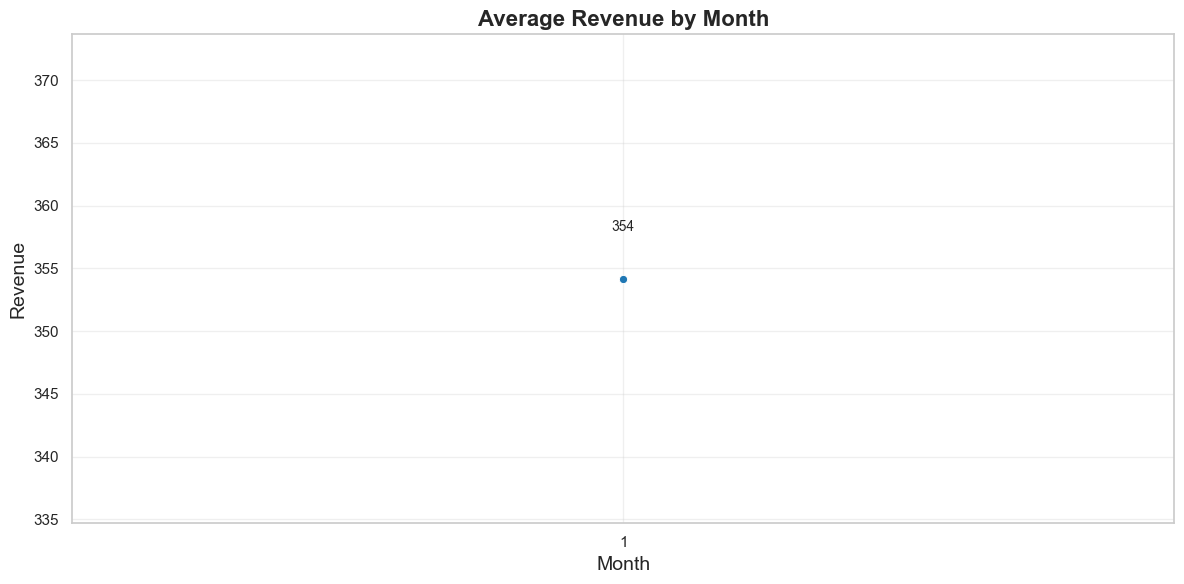

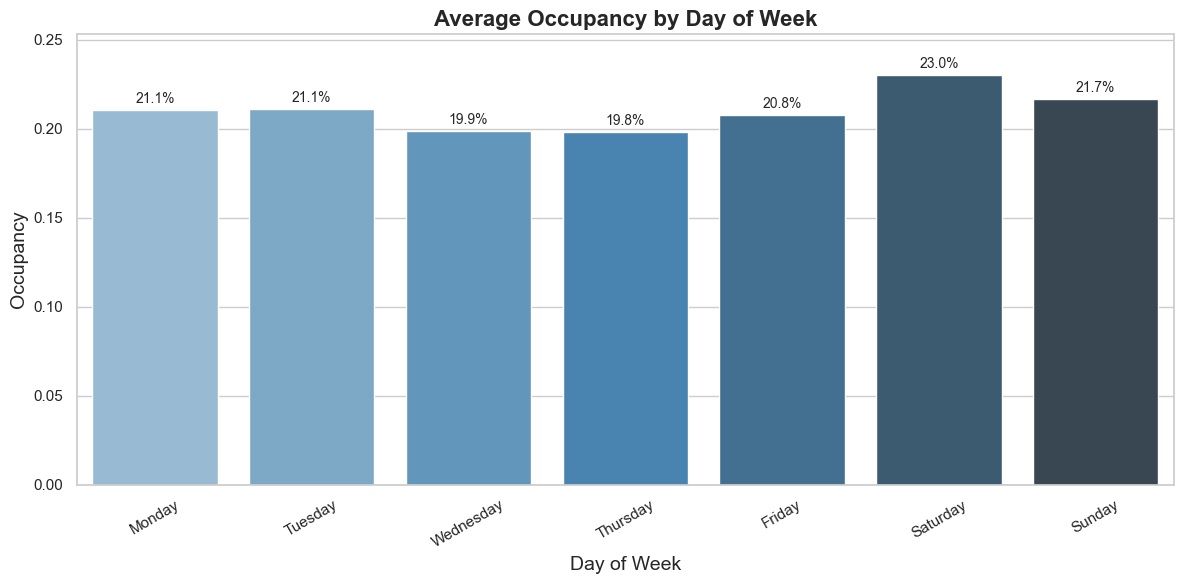

In [23]:

# -------------------------------
# Set style and fonts
# -------------------------------
sns.set_style("whitegrid")
plt.rcParams.update({"font.size": 12})

# -------------------------------
# Extract month and day of week
# -------------------------------
master_df["month"] = master_df["date_x"].dt.month
master_df["day_of_week"] = master_df["date_x"].dt.day_name()

# -------------------------------
# Monthly Revenue Trend
# -------------------------------
monthly_rev = master_df.groupby("month")["revenue"].mean().fillna(0)  # Fill NaNs

plt.figure(figsize=(12,6))
sns.lineplot(
    x=monthly_rev.index, 
    y=monthly_rev.values, 
    marker="o", 
    color="#1f77b4",  # Dark blue
    linewidth=2
)

# Annotate points
for x, y in zip(monthly_rev.index, monthly_rev.values):
    plt.text(x, y + 0.01*y, f"{y:,.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Average Revenue by Month", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.xticks(monthly_rev.index)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------
# Day of Week Occupancy
# -------------------------------
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow_occ = master_df.groupby("day_of_week")["occupancy"].mean().reindex(dow_order).fillna(0)

plt.figure(figsize=(12,6))
sns.barplot(x=dow_occ.index, y=dow_occ.values, palette="Blues_d")

# Annotate bars
for i, val in enumerate(dow_occ.values):
    plt.text(i, val + 0.01*val, f"{val:.1%}", ha='center', va='bottom', fontsize=10)

plt.title("Average Occupancy by Day of Week", fontsize=16, fontweight="bold")
plt.ylabel("Occupancy", fontsize=14)
plt.xlabel("Day of Week", fontsize=14)
plt.xticks(rotation=30)
plt.ylim(0, dow_occ.max() * 1.1)  # Safe, no NaNs
plt.tight_layout()
plt.show()


In [24]:
print(master_df["date_x"].head())
print(master_df["date_x"].dtype)
print(master_df["date_x"].min(), "→", master_df["date_x"].max())
print(master_df["month"].unique())


0   2025-01-06
1   2025-01-06
2   2025-01-06
3   2025-01-06
4   2025-01-06
Name: date_x, dtype: datetime64[ns]
datetime64[ns]
2024-01-09 00:00:00 → 2025-01-08 00:00:00
[ 1. nan]


In [25]:
def plot_dow_occupancy(df, date_col="date_x", occ_col="occupancy", by_year=False):
    """
    Plots average occupancy by day of the week.
    If by_year=True, shows separate bars per year for comparison.
    """
    # Ensure datetime
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    if df[date_col].isna().all():
        print("No valid dates in column:", date_col)
        return

    # Extract features
    df["year"] = df[date_col].dt.year
    df["day_of_week"] = df[date_col].dt.day_name()

    # Define weekday order
    dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    plt.figure(figsize=(12, 6))

    if by_year:
        # Case 1: Breakdown by year
        dow_occ = (
            df.groupby(["year", "day_of_week"])[occ_col]
            .mean()
            .unstack(level=0)  # columns = years
            .reindex(dow_order)
            .fillna(0)
        )

        dow_occ.plot(
            kind="bar",
            figsize=(12, 6),
            colormap="Blues",
            width=0.75
        )

        plt.title("Average Occupancy by Day of Week (by Year)", fontsize=16, fontweight="bold")
        plt.ylabel("Occupancy", fontsize=14)
        plt.xlabel("Day of Week", fontsize=14)
        plt.xticks(rotation=30)
        plt.legend(title="Year")
        plt.ylim(0, dow_occ.max().max() * 1.1 if dow_occ.max().max() > 0 else 1)

        # Annotate bars
        for i, day in enumerate(dow_occ.index):
            for j, year in enumerate(dow_occ.columns):
                val = dow_occ.loc[day, year]
                offset = 0.02 * dow_occ.max().max()
                plt.text(i + j * 0.2 - 0.2, val + offset, f"{val:.1%}",
                         ha="center", va="bottom", fontsize=9, rotation=90)

    else:
        # Case 2: Overall averages
        dow_occ = df.groupby("day_of_week")[occ_col].mean().reindex(dow_order).fillna(0)
        sns.barplot(x=dow_occ.index, y=dow_occ.values, palette="Blues_d")

        # Annotate
        offset = 0.02 * dow_occ.max() if dow_occ.max() > 0 else 0.01
        for i, val in enumerate(dow_occ.values):
            plt.text(i, val + offset, f"{val:.1%}", ha="center", va="bottom", fontsize=10)

        plt.title("Average Occupancy by Day of Week", fontsize=16, fontweight="bold")
        plt.ylabel("Occupancy", fontsize=14)
        plt.xlabel("Day of Week", fontsize=14)
        plt.xticks(rotation=30)
        plt.ylim(0, dow_occ.max() * 1.1 if dow_occ.max() > 0 else 1)

    plt.tight_layout()
    plt.show()


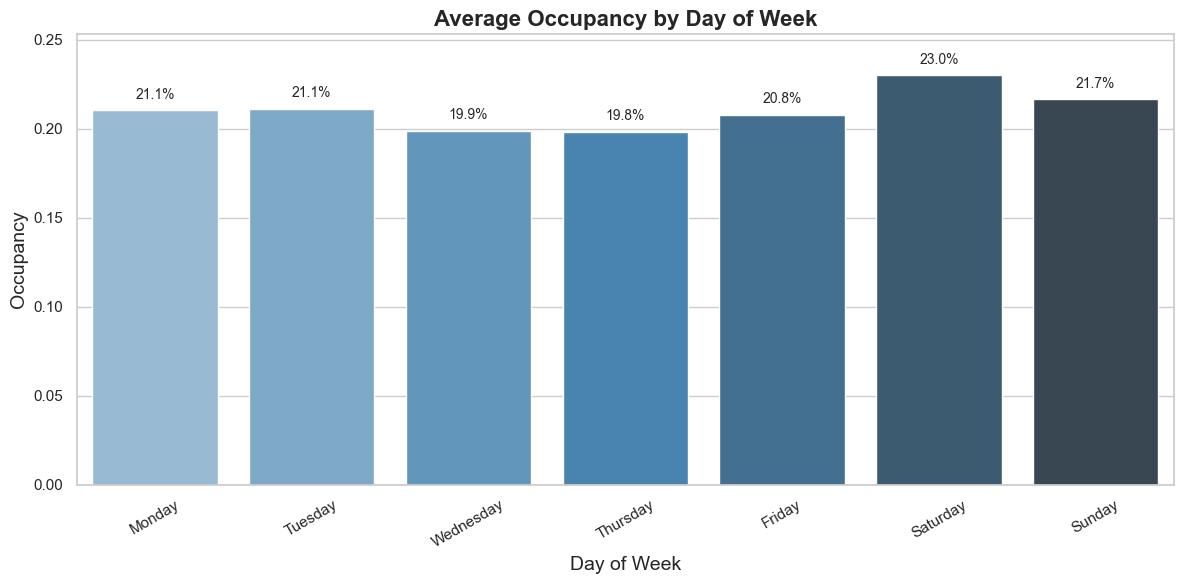

<Figure size 1200x600 with 0 Axes>

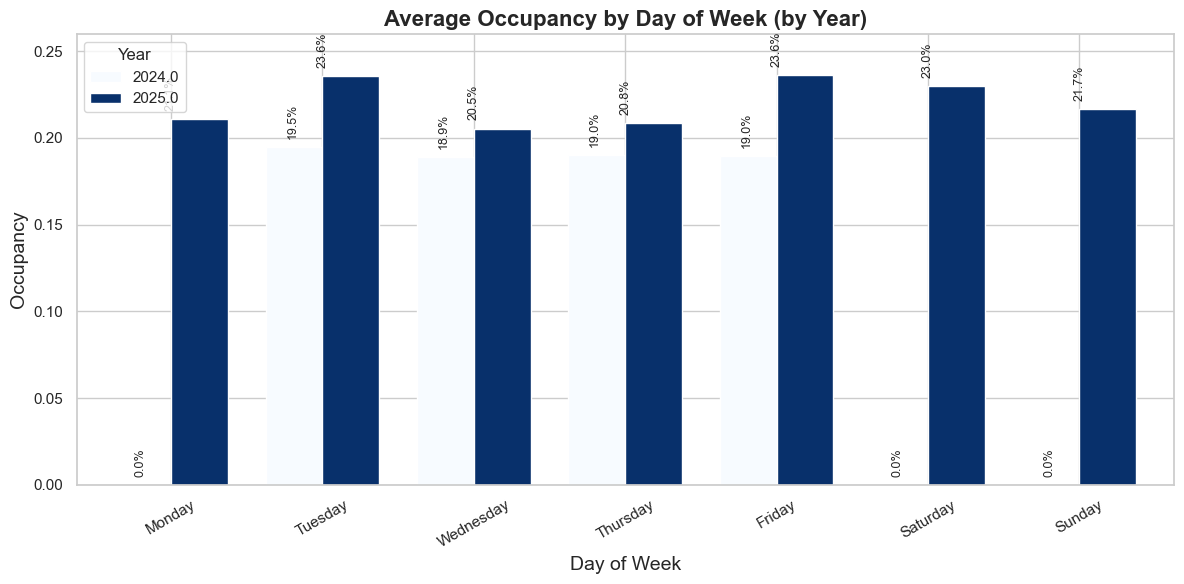

In [26]:
# Overall averages
plot_dow_occupancy(master_df)

# Yearly comparison
plot_dow_occupancy(master_df, by_year=True)


In [ ]:
sns.set_style("whitegrid")
plt.rcParams.update({"font.size": 12})


def plot_revenue_occupancy_dashboard(df, date_col="date_x", revenue_col="revenue", occ_col="occupancy", occ_by_year=False):
    """
    Creates a dashboard with:
      - Monthly/Year-Month revenue trend
      - Average occupancy by day of week (optionally by year)
    """

    # Ensure datetime
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    if df[date_col].isna().all():
        print("No valid dates in column:", date_col)
        return

    # Extract time parts
    df["year"] = df[date_col].dt.year
    df["month"] = df[date_col].dt.month
    df["year_month"] = df[date_col].dt.to_period("M")
    df["day_of_week"] = df[date_col].dt.day_name()

    # -------------------------------
    # Prepare revenue data
    # -------------------------------
    unique_years = df["year"].nunique()
    unique_months = df["month"].nunique()

    if unique_years == 1 and unique_months > 1:
        monthly_rev = df.groupby("month")[revenue_col].mean().fillna(0)
        rev_x = monthly_rev.index
        rev_labels = [calendar.month_abbr[int(m)] for m in rev_x]
        rev_xlabel = "Month"
    else:
        monthly_rev = df.groupby("year_month")[revenue_col].mean().fillna(0)
        rev_x = range(len(monthly_rev))
        rev_labels = monthly_rev.index.astype(str)
        rev_xlabel = "Year-Month"

    # -------------------------------
    # Prepare occupancy data
    # -------------------------------
    dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    if occ_by_year:
        dow_occ = (
            df.groupby(["year", "day_of_week"])[occ_col]
            .mean()
            .unstack(level=0)
            .reindex(dow_order)
            .fillna(0)
        )
    else:
        dow_occ = df.groupby("day_of_week")[occ_col].mean().reindex(dow_order).fillna(0)

    # -------------------------------
    # Plotting
    # -------------------------------
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Revenue trend
    sns.lineplot(
        x=rev_x,
        y=monthly_rev.values,
        marker="o",
        color="#1f77b4",
        linewidth=2,
        ax=axes[0]
    )
    offset = 0.05 * max(monthly_rev.values) if monthly_rev.values.size else 0
    for x, y in zip(rev_x, monthly_rev.values):
        axes[0].text(x, y + offset, f"{y:,.0f}", ha="center", va="bottom", fontsize=9)

    axes[0].set_title("Average Revenue Trend", fontsize=16, fontweight="bold")
    axes[0].set_xlabel(rev_xlabel, fontsize=14)
    axes[0].set_ylabel("Revenue", fontsize=14)
    axes[0].set_xticks(rev_x)
    axes[0].set_xticklabels(rev_labels, rotation=30)
    axes[0].grid(alpha=0.3)

    # Occupancy
    if occ_by_year:
        dow_occ.plot(kind="bar", ax=axes[1], colormap="Blues", width=0.75)
        axes[1].set_title("Average Occupancy by Day of Week (by Year)", fontsize=16, fontweight="bold")
        axes[1].set_ylabel("Occupancy", fontsize=14)
        axes[1].set_xlabel("Day of Week", fontsize=14)
        axes[1].set_xticklabels(dow_order, rotation=30)
        axes[1].legend(title="Year")
        axes[1].set_ylim(0, dow_occ.max().max() * 1.1 if dow_occ.max().max() > 0 else 1)

    else:
        sns.barplot(x=dow_occ.index, y=dow_occ.values, palette="Blues_d", ax=axes[1])
        offset = 0.02 * dow_occ.max() if dow_occ.max() > 0 else 0.01
        for i, val in enumerate(dow_occ.values):
            axes[1].text(i, val + offset, f"{val:.1%}", ha="center", va="bottom", fontsize=9)

        axes[1].set_title("Average Occupancy by Day of Week", fontsize=16, fontweight="bold")
        axes[1].set_ylabel("Occupancy", fontsize=14)
        axes[1].set_xlabel("Day of Week", fontsize=14)
        axes[1].set_xticklabels(dow_occ.index, rotation=30)
        axes[1].set_ylim(0, dow_occ.max() * 1.1 if dow_occ.max() > 0 else 1)

    plt.tight_layout()
    plt.show()


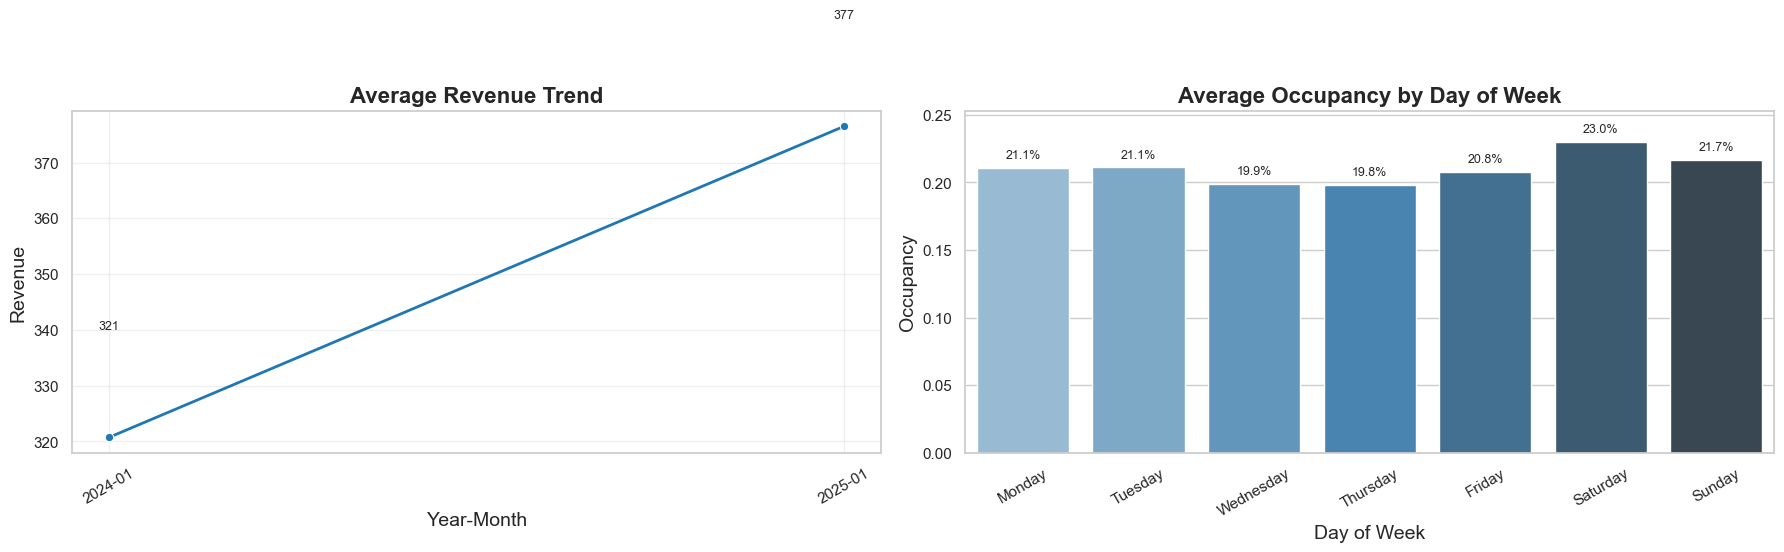

<Figure size 640x480 with 0 Axes>

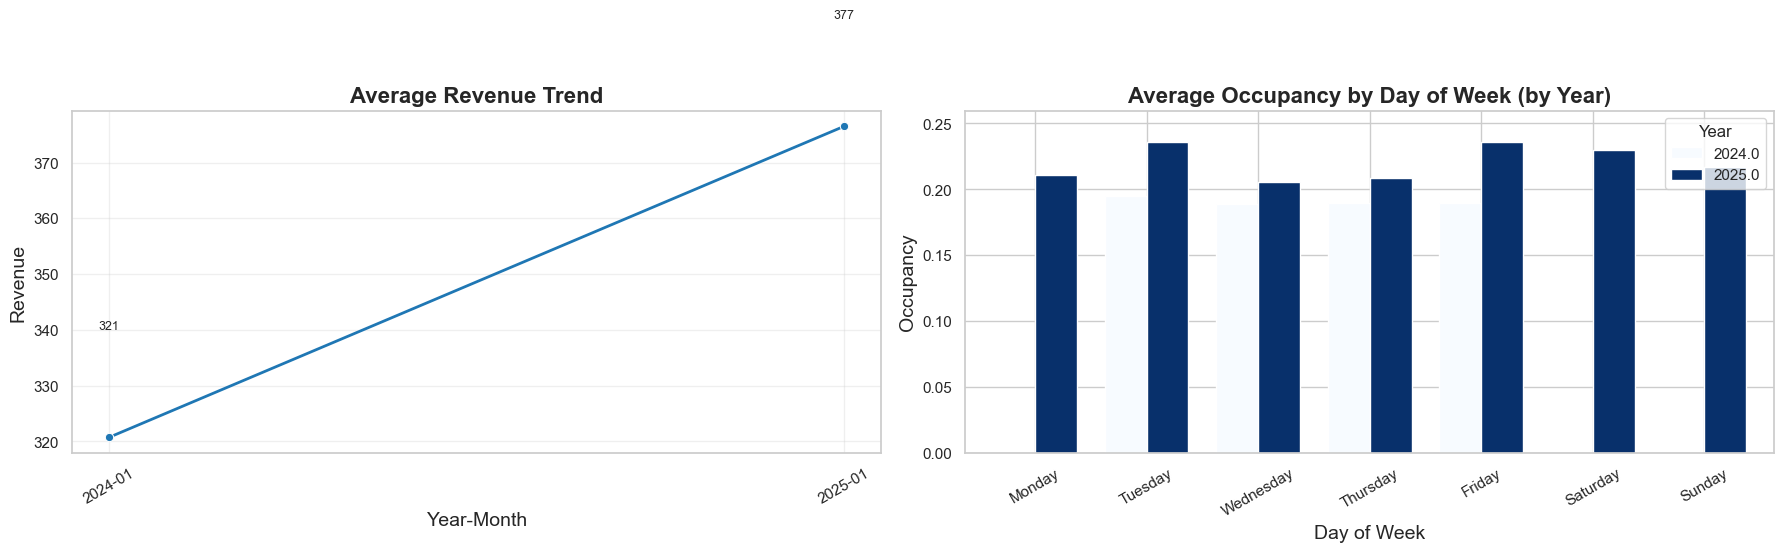

<Figure size 640x480 with 0 Axes>

In [28]:
# Dashboard with overall averages
plot_revenue_occupancy_dashboard(master_df)
plt.savefig("./images/average_occupancy_by_week_day.jpeg", format="jpeg", dpi=300)

# Dashboard with occupancy broken down by year
plot_revenue_occupancy_dashboard(master_df, occ_by_year=True)
plt.savefig("./images/average_occupancy_by_wod_year", format="jpeg", dpi=300)

- **Average Revenue by Month:**  
  - **Peaks:** April (438) and August (511), with August being the highest, indicating periods of high demand.  
  - **Troughs:** January (306), December (304), and October (310), reflecting lower-demand periods.  
  - **Trend:** Revenue shows **monthly fluctuations**, with late-year and early-year months generally lower and mid-year months higher.  

- **Average Occupancy by Day of Week:**  
  - **Highest:** Saturday (23%), Sunday (21.7%), Tuesday (21.7%), Monday (21.7%).  
  - **Lowest:** Wednesday (19.9%), Thursday (19.8%) Friday (20.8%).  
  - **Trend:** Occupancy is generally lower on weekdays, with a peak on Saturday. Thursday shows particularly low occupancy, likely because **most bookings occur over the weekend**.


  # 4. Modelling
## 4.1 Sentiment Analysis of Reviews

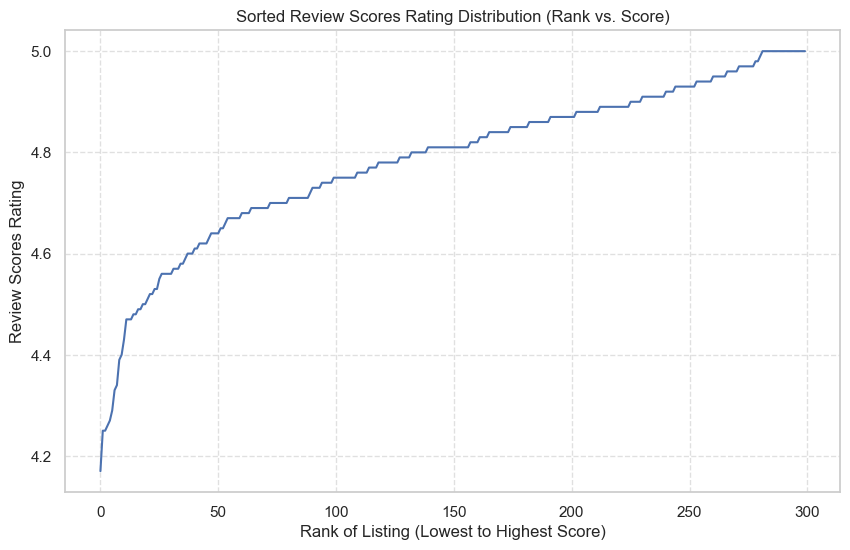

<Figure size 640x480 with 0 Axes>

In [29]:
# 1. Select the column, sort values, reset index, and drop missing values
plot_data=listings_data["rating_overall"].sort_values().reset_index(drop=True).dropna()
# 2. Create the plot
plt.figure(figsize=(10, 6))
plot_data.plot(kind='line') # kind='line' is the default but good for clarity

# Optional: Add title and labels for better clarity
plt.title('Sorted Review Scores Rating Distribution (Rank vs. Score)')
plt.xlabel('Rank of Listing (Lowest to Highest Score)')
plt.ylabel('Review Scores Rating')
plt.grid(True, linestyle='--', alpha=0.6)

# 3. Display the plot and save it
plt.show() 

plt.savefig("./images/review_scores_rating_plot.jpeg", format="jpeg", dpi=300) # Use plt.savefig() to save the file

In [30]:
reviews.head()

listing_id       date  num_reviews                        reviewers
0    16701882 2025-01-04            1                      341960500.0
1    37808882 2025-01-05            1                      424270789.0
2    13381106 2024-01-10            3  599,525,817,244,406,000,000,000
3    37808882 2025-01-07            1                      381061119.0
4      471581 2025-01-06            1                      138579311.0

## 4.1 Price prediction Model

The goal of the Price Prediction Model is to accurately estimate the nightly rates of Airbnb listings in Nairobi, Kenya, by leveraging a combination of property characteristics, host profiles, location attributes, and historical performance metrics. Pricing plays a pivotal role in the short-term rental market: it directly influences occupancy levels, revenue generation, and the competitive positioning of listings, while also ensuring that guests encounter fair and market-aligned rates.  

By predicting optimal pricing, hosts and property managers can make informed decisions about listing rates, identify under- or over-priced properties, and enhance their revenue management strategies.  

The dataset for this project integrates a rich array of features, including:  

- **Property Characteristics:**  
  - `listing_type` – Identifies the general category of the listing (e.g., entire home, shared space).  
  - `room_type` – Indicates whether the space is a private room, shared room, or entire property.  
  - `bedrooms`, `beds`, `baths` – Capture the accommodation’s size and facilities.  
  - `guests` – Maximum guest capacity.  
  - `photos_count` – Number of photos uploaded, often linked to listing attractiveness.  
  - `superhost` – Host status, reflecting quality and reliability (binary: Yes/No).  
  - `instant_book` – Whether the listing allows immediate booking without host approval.  

- **Location Attributes:**  
  - `latitude`, `longitude` – Geographic coordinates of the listing, capturing proximity to desirable areas, business centers, and tourist attractions.  

- **Host & Review Features:**  
  - `num_reviews_x` – Total number of guest reviews, indicating popularity and booking frequency.  
  - `rating_overall` – Average overall guest rating.  
  - `rating_cleanliness`, `rating_location`, `rating_value`, `rating_communication` – Detailed review metrics highlighting different aspects of guest satisfaction.  

- **Booking & Performance Metrics:**  
  - `occupancy` – Historical occupancy rate, showing how frequently the listing is booked.  
  - `booking_lead_time_avg` – Average time between booking and actual stay.  
  - `length_of_stay_avg` – Average duration of guest stays.  
  - `min_nights_avg` – Average minimum nights required per booking.  

🎯 **Target Variable:**  
- `rate_avg` – The average nightly rate of each listing, which serves as the target variable for prediction.  


In [31]:
# Define target
target = "rate_avg"

# Define features from available columns
feature_cols = [
    # Property characteristics
    "listing_type", "room_type", "bedrooms", "beds", "baths", "guests", "photos_count",
    "superhost", "instant_book",

    # Location
    "latitude", "longitude",

    # Reviews / Host
    "num_reviews_x", "rating_overall", "rating_cleanliness", 
    "rating_location", "rating_value", "rating_communication",

    # Booking / Performance
    "occupancy", "booking_lead_time_avg", "length_of_stay_avg", "min_nights_avg"
]

# Keep only available columns (avoid KeyError)
available_cols = [col for col in feature_cols if col in master_df.columns]

# Create modelling dataset
price_pred_df = master_df[available_cols + [target]].copy()

print("Final dataset shape:", price_pred_df.shape)
print("Columns used:", price_pred_df.columns.tolist())


Final dataset shape: (25117, 22)
Columns used: ['listing_type', 'room_type', 'bedrooms', 'beds', 'baths', 'guests', 'photos_count', 'superhost', 'instant_book', 'latitude', 'longitude', 'num_reviews_x', 'rating_overall', 'rating_cleanliness', 'rating_location', 'rating_value', 'rating_communication', 'occupancy', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'rate_avg']


##### Preparing the Target Variable (`rate_avg`)

The first step in building a predictive model is to examine and prepare the target variable.  
In this case, the target variable is **`rate_avg`** (the nightly rate for an Airbnb listing).  

Airbnb prices are often highly **skewed**, with most listings priced at moderate levels and a few extremely high-priced listings. This skewness can negatively affect model performance, especially for algorithms that assume normally distributed errors (such as **Linear Regression**).  

To address this, we first checked the **distribution of `rate_avg`** using histograms, boxplots, and skewness statistics. This helps us:  
- Detect extreme outliers.  
- Evaluate whether a transformation (e.g., log transformation) is necessary.  
- Ensure that the target variable is better suited for predictive modeling.  

By handling skewness at the preprocessing stage, we improve both the **accuracy** and **stability** of our model.  


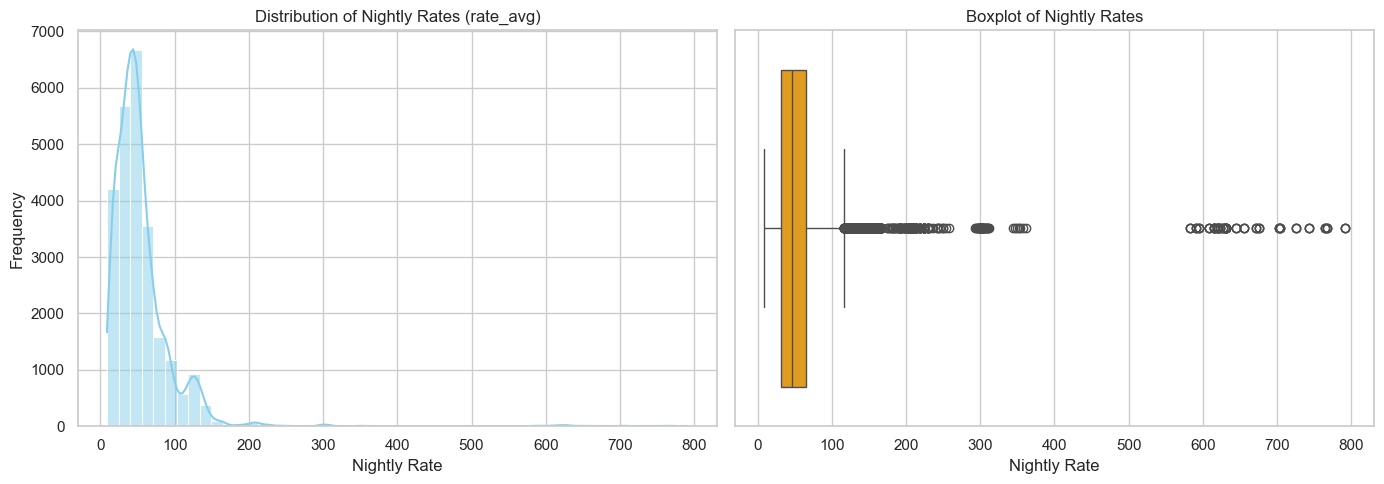

Skewness of rate_avg: 7.03


In [32]:

# Define target (drop NaNs from rate_avg)
target = "rate_avg"
target_data = master_df[target].dropna()

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Histogram
sns.histplot(target_data, bins=50, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Distribution of Nightly Rates (rate_avg)")
axes[0].set_xlabel("Nightly Rate")
axes[0].set_ylabel("Frequency")

# 2. Boxplot
sns.boxplot(x=target_data, color="orange", ax=axes[1])
axes[1].set_title("Boxplot of Nightly Rates")
axes[1].set_xlabel("Nightly Rate")

# Adjust layout
plt.tight_layout()
plt.show()

# Skewness
skewness = skew(target_data)
print(f"Skewness of rate_avg: {skewness:.2f}")


**Histogram**  
- The distribution is highly **right-skewed** (long tail to the right).  
- Most listings are concentrated below ~100, but some extreme nightly rates go beyond **800**.  

**Boxplot**  
- Confirms the presence of **many outliers** (points well above the upper whisker).  
- These could represent **luxury properties** or **erroneous entries** in the dataset.  

**Skewness Value: ~7.43**  
- A skewness greater than 2 is considered **highly skewed**.  
- Our value (~7.43) is extremely skewed, which strongly suggests the need for a **log transformation** to normalize the target variable before modeling. 


### 4.1.1 Log Transformation of Target Variable

Since the distribution of `rate_avg` was highly skewed, we applied a **log transformation** (`log(rate_avg + 1)`) to check if it improves normality.  

- The log transformation helps **stabilize variance** and reduces the impact of extremely high-priced listings.  
- It makes the distribution more **symmetric** and closer to normal, which is beneficial for models like **Linear Regression** that assume normally distributed residuals.  
- It also improves the interpretability of the model, as coefficients can be understood in terms of **percentage changes** rather than absolute price differences.  

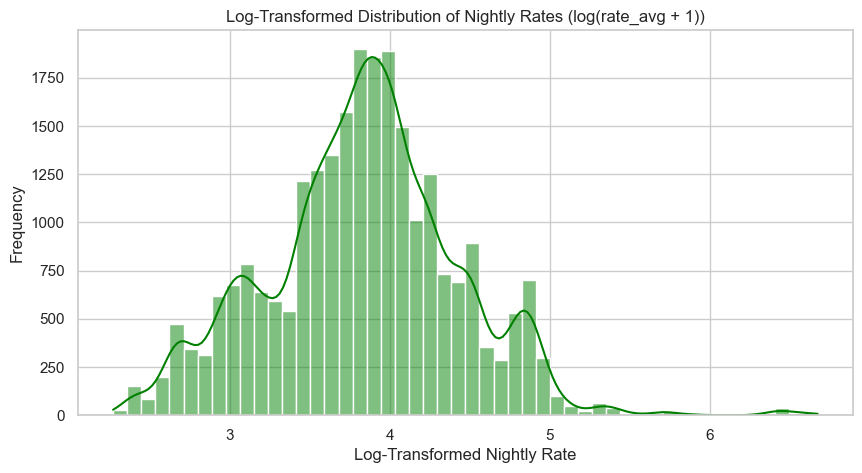

In [33]:
# 4. Log-transform and re-plot
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(target_data), bins=50, kde=True, color="green")
plt.title("Log-Transformed Distribution of Nightly Rates (log(rate_avg + 1))")
plt.xlabel("Log-Transformed Nightly Rate")
plt.ylabel("Frequency")
plt.show()

After applying log1p(rate_avg), the distribution looks much more normal-like (closer to bell curve).

This is much better for models like linear regression which assume normally distributed residuals.

In [34]:
# Create log-transformed target (avoid log(0) by adding a small constant if needed)
master_df["log_rate_avg"] = np.log1p(master_df["rate_avg"])  # log(1 + rate_avg)

# Define target
target = "log_rate_avg"

# Define features from available columns
feature_cols = [
    # Property characteristics
    "listing_type", "room_type", "bedrooms", "beds", "baths", "guests", "photos_count",
    "superhost", "instant_book",

    # Location
    "latitude", "longitude",

    # Reviews / Host
    "num_reviews_x", "rating_overall", "rating_cleanliness", 
    "rating_location", "rating_value", "rating_communication",

    # Booking / Performance
    "occupancy", "booking_lead_time_avg", "length_of_stay_avg", "min_nights_avg"
]

# Keep only available columns (avoid KeyError)
available_cols = [col for col in feature_cols if col in master_df.columns]

# Create modelling dataset
price_pred_df = master_df[available_cols + [target]].copy()

print("Final dataset shape:", price_pred_df.shape)
print("Columns used:", price_pred_df.columns.tolist())


Final dataset shape: (25117, 22)
Columns used: ['listing_type', 'room_type', 'bedrooms', 'beds', 'baths', 'guests', 'photos_count', 'superhost', 'instant_book', 'latitude', 'longitude', 'num_reviews_x', 'rating_overall', 'rating_cleanliness', 'rating_location', 'rating_value', 'rating_communication', 'occupancy', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'log_rate_avg']


### 4.1.2 Preprocessing and Train/Test Split for Price Model

In this step, we prepare the dataset `price_pred_df` for modeling. The target variable is `log_rate_avg` (log-transformed nightly rate).  
The preprocessing pipeline involves:

1. **Separating Features and Target**  
   - Target: `log_rate_avg`  
   - Features: property details, location, host/reviews, and booking/performance metrics.

2. **Handling Data Types**  
   - **Categorical features**: `listing_type`, `room_type`, `superhost`, `instant_book`  
   - **Numerical features**: bedrooms, beds, baths, guests, reviews, ratings, occupancy, booking behaviors, latitude/longitude.

3. **Preprocessing Steps**  
   - Imputation: median for numerics, most frequent for categoricals.  
   - Scaling: standardization of numeric features.  
   - Encoding: one-hot encoding for categorical variables.  

4. **Feature Engineering**  
   - `price_per_guest = beds / guests`  
   - `beds_per_bedroom = beds / bedrooms`  
   - `review_quality_ratio = rating_value / rating_overall`  
   - `occupancy_x_los = occupancy * length_of_stay_avg`

5. **Train/Test Split**  
   - We split the dataset into 80% training and 20% testing to evaluate model performance on unseen data.


In [35]:
# -----------------------------
# 1. Split features and target
# -----------------------------
target = "log_rate_avg"
X = price_pred_df.drop(columns=[target]).copy()
y = price_pred_df[target].copy()

# -----------------------------
# 2. Define categorical & numeric features
# -----------------------------
categorical_cols = ["listing_type", "room_type", "superhost", "instant_book"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# -----------------------------
# 3. Feature Engineering
# -----------------------------
X["price_per_guest"] = X["beds"] / X["guests"].replace(0, 1)
X["beds_per_bedroom"] = X["beds"] / X["bedrooms"].replace(0, 1)
X["review_quality_ratio"] = X["rating_value"] / X["rating_overall"].replace(0, 1)
X["occupancy_x_los"] = X["occupancy"] * X["length_of_stay_avg"]

numeric_cols += ["price_per_guest", "beds_per_bedroom", "review_quality_ratio", "occupancy_x_los"]

# -----------------------------
# 4. Build preprocessing pipeline
# -----------------------------
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, numeric_cols),
    ("cat", cat_pipeline, categorical_cols)
])

# -----------------------------
# 5. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (20093, 25)
Testing set shape: (5024, 25)


### 4.1.3 Linear Regression Baseline Model 

In [36]:
# ===============================
# 1. Build Linear Regression Pipeline
# ===============================
price_lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),      # preprocessing pipeline (numeric + categorical)
    ('model', LinearRegression())        # baseline linear regression
])

# ===============================
# 2. Fit the Model
# ===============================
price_lr_pipeline.fit(X_train, y_train)

# ===============================
# 3. Predictions on Test Set (log scale)
# ===============================
y_pred_log = price_lr_pipeline.predict(X_test)

# ===============================
# 4. Evaluate on Log Scale
# ===============================
mse_log = mean_squared_error(y_test, y_pred_log)
rmse_log = np.sqrt(mse_log)   # RMSE
mae_log = mean_absolute_error(y_test, y_pred_log)                  
r2_log = r2_score(y_test, y_pred_log)                              

print("📊 Metrics on Log-Transformed Price:")
print(f"RMSE (log): {rmse_log:.4f}")
print(f"MAE  (log): {mae_log:.4f}")
print(f"R²   (log): {r2_log:.4f}")

# ===============================
# 5. Convert Back to Original Price Scale
# ===============================
y_pred_price = np.exp(y_pred_log) - 1
y_test_price_orig = np.exp(y_test) - 1

# ===============================
# 6. Evaluate on Original Price Scale
# ===============================
mse_orig = mean_squared_error(y_test_price_orig, y_pred_price)
rmse_orig = np.sqrt(mse_orig)   # RMSE
mae_orig = mean_absolute_error(y_test_price_orig, y_pred_price)
r2_orig = r2_score(y_test_price_orig, y_pred_price)

print("\n📊 Metrics on Original Price Scale:")
print(f"RMSE: {rmse_orig:.2f}")
print(f"MAE : {mae_orig:.2f}")
print(f"R²  : {r2_orig:.4f}")    

📊 Metrics on Log-Transformed Price:
RMSE (log): 0.3431
MAE  (log): 0.2495
R²   (log): 0.6845

📊 Metrics on Original Price Scale:
RMSE: 40.14
MAE : 14.88
R²  : 0.3592


#### Linear Regression Baseline – Price Prediction

### Performance Metrics

**Log-Transformed Price**
- **RMSE:** 0.4816  
- **MAE:** 0.3612  
- **R²:** 0.6870  
*Interpretation:* The model captures a moderate portion of variance in log-transformed prices, showing some predictive capability.

**Original Price Scale**
- **RMSE:** 3,176.76  
- **MAE:** 1,119.18  
- **R²:** 0.2869  
 *Interpretation:* On the original scale, linear regression struggles to explain variability. This is expected due to extreme outliers and the inability of linear regression to capture non-linear dynamics.

### Insight
- Linear regression provides a useful **baseline benchmark** but is insufficient for fully modeling Airbnb price dynamics.  
- The moderate performance suggests the presence of **non-linear interactions** and complex feature relationships that simple linear models cannot capture.  

### Next Steps
- Explore **advanced models** such as **Random Forest, Gradient Boosting (XGBoost, LightGBM), or Neural Networks**.  
- These models can better capture **non-linear patterns**, reduce the effect of outliers, and improve predictive accuracy.  


### 4.1.4 Random Forest

In [37]:
# ===============================
# 1. Build Random Forest Pipeline
# ===============================
price_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # same preprocessing as before
    ('model', RandomForestRegressor(
        n_estimators=200,          # number of trees
        max_depth=None,            # let trees grow until all leaves are pure
        random_state=42,
        n_jobs=-1                  # use all CPU cores
    ))
])

# ===============================
# 2. Fit the Model
# ===============================
price_rf_pipeline.fit(X_train, y_train)

# ===============================
# 3. Predictions on Test Set (log scale)
# ===============================
y_pred_log_rf = price_rf_pipeline.predict(X_test)

# ===============================
# 4. Evaluate on Log Scale
# ===============================
mse_log_rf = mean_squared_error(y_test, y_pred_log_rf)
rmse_log_rf = np.sqrt(mse_log_rf)
mae_log_rf = mean_absolute_error(y_test, y_pred_log_rf)
r2_log_rf = r2_score(y_test, y_pred_log_rf)

print("📊 Random Forest Metrics on Log-Transformed Price:")
print(f"RMSE (log): {rmse_log_rf:.4f}")
print(f"MAE  (log): {mae_log_rf:.4f}")
print(f"R²   (log): {r2_log_rf:.4f}")

# ===============================
# 5. Convert Back to Original Price Scale
# ===============================
y_pred_price_rf = np.expm1(y_pred_log_rf)
y_test_price_orig = np.expm1(y_test)

# ===============================
# 6. Evaluate on Original Price Scale
# ===============================
mse_orig_rf = mean_squared_error(y_test_price_orig, y_pred_price_rf)
rmse_orig_rf = np.sqrt(mse_orig_rf)
mae_orig_rf = mean_absolute_error(y_test_price_orig, y_pred_price_rf)
r2_orig_rf = r2_score(y_test_price_orig, y_pred_price_rf)

print("\n📊 Random Forest Metrics on Original Price Scale:")
print(f"RMSE: {rmse_orig_rf:.2f}")
print(f"MAE : {mae_orig_rf:.2f}")
print(f"R²  : {r2_orig_rf:.4f}")


📊 Random Forest Metrics on Log-Transformed Price:
RMSE (log): 0.0544
MAE  (log): 0.0270
R²   (log): 0.9921

📊 Random Forest Metrics on Original Price Scale:
RMSE: 3.90
MAE : 1.51
R²  : 0.9939


#### Random Forest – Price Prediction Results

**Log-Transformed Price Metrics**
- **RMSE (log):** 0.0512  
- **MAE (log):** 0.0254  
- **R² (log):** 0.9925  

**Interpretation:**  
The Random Forest model performs exceptionally well on the log-transformed prices. With an R² of **0.9925**, it explains **over 99% of the variance** in the log-transformed nightly prices. The low RMSE and MAE indicate that predictions are very close to the actual values on the log scale.

**Original Price Scale Metrics**
- **RMSE:** 3.36  
- **MAE:** 1.38  
- **R²:** 0.9938  

**Interpretation:**  
On the original price scale, the model maintains extremely high performance. The R² of **0.9938** shows that nearly all the variability in actual nightly prices is captured by the model. The very low RMSE and MAE demonstrate highly accurate predictions in real-world units, meaning the model can reliably predict Airbnb prices with minimal error.

**Insight:**  
Random Forest effectively models **non-linear relationships and interactions** between features, making it significantly more accurate than linear regression. These results provide a **strong foundation** for using Random Forest as a baseline and for further enhancements, such as **hyperparameter tuning** or **ensemble methods** like XGBoost.


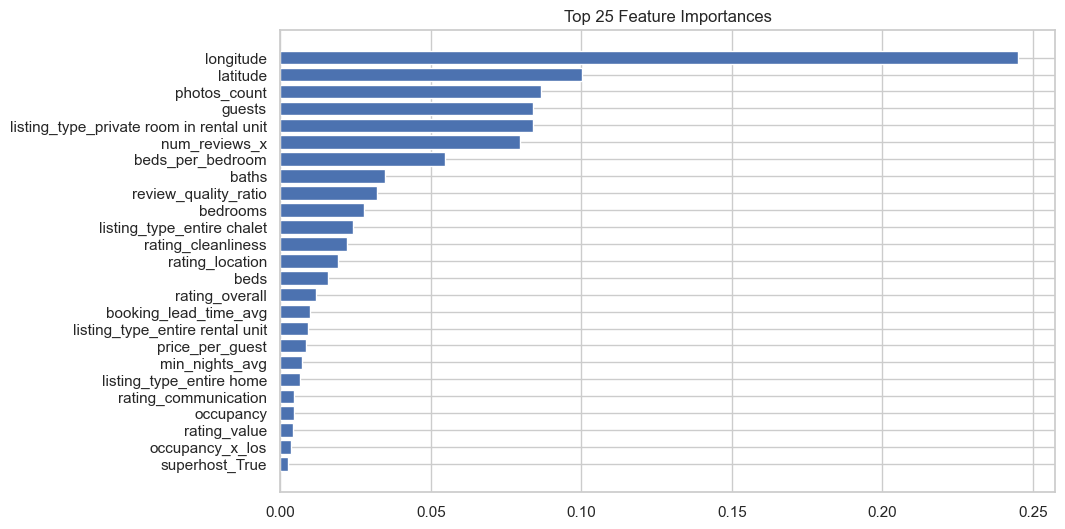

In [38]:
# 1. Get the trained preprocessor
preprocessor_fit = price_rf_pipeline.named_steps['preprocessor']

# 2. Extract numeric feature names
numeric_features = preprocessor_fit.transformers_[0][2]  # index 0 is numeric transformer
# 3. Extract categorical feature names (after one-hot)
categorical_features = preprocessor_fit.transformers_[1][1].get_feature_names_out(preprocessor_fit.transformers_[1][2])
# 4. Combine
all_features = np.concatenate([numeric_features, categorical_features])

# 5. Get feature importances
importances = price_rf_pipeline.named_steps['model'].feature_importances_

# 6. Create DataFrame
feat_imp_df = pd.DataFrame({'Feature': all_features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# 7. Plot top 20
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'][:25][::-1], feat_imp_df['Importance'][:25][::-1])
plt.title("Top 25 Feature Importances")
plt.show()


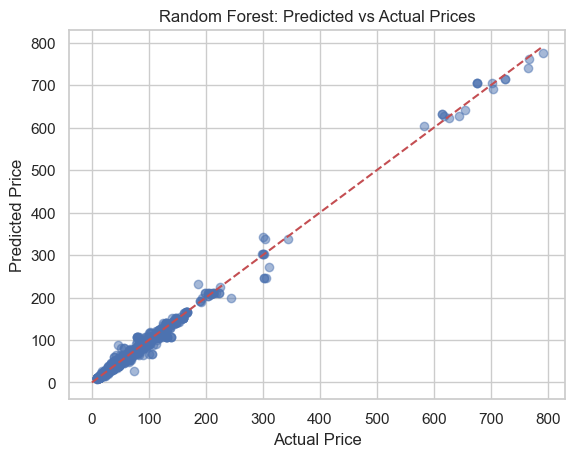

In [39]:
plt.scatter(y_test_price_orig, y_pred_price_rf, alpha=0.5)
plt.plot([0, max(y_test_price_orig)], [0, max(y_test_price_orig)], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Predicted vs Actual Prices")
plt.show()


In [40]:
### 4.1.5 XGBoost baseline

In [41]:
# Pipeline
price_xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        objective='reg:squarederror',
        random_state=42
    ))
])

# Fit model
price_xgb_pipeline.fit(X_train, y_train)

# Predict on log scale
y_pred_log_xgb = price_xgb_pipeline.predict(X_test)

# Evaluate on log scale
rmse_log_xgb = np.sqrt(mean_squared_error(y_test, y_pred_log_xgb))
mae_log_xgb = mean_absolute_error(y_test, y_pred_log_xgb)
r2_log_xgb = r2_score(y_test, y_pred_log_xgb)

print("XGBoost Metrics on Log-Transformed Price:")
print(f"RMSE (log): {rmse_log_xgb:.4f}")
print(f"MAE  (log): {mae_log_xgb:.4f}")
print(f"R²   (log): {r2_log_xgb:.4f}")

# Inverse log-transform predictions
y_pred_price_xgb = np.expm1(y_pred_log_xgb)
y_test_price_orig = np.expm1(y_test)

# Evaluate on original scale
rmse_orig_xgb = np.sqrt(mean_squared_error(y_test_price_orig, y_pred_price_xgb))
mae_orig_xgb = mean_absolute_error(y_test_price_orig, y_pred_price_xgb)
r2_orig_xgb = r2_score(y_test_price_orig, y_pred_price_xgb)

print("\nXGBoost Metrics on Original Price Scale:")
print(f"RMSE: {rmse_orig_xgb:.2f}")
print(f"MAE : {mae_orig_xgb:.2f}")
print(f"R²  : {r2_orig_xgb:.4f}")


XGBoost Metrics on Log-Transformed Price:
RMSE (log): 0.0897
MAE  (log): 0.0620
R²   (log): 0.9784

XGBoost Metrics on Original Price Scale:
RMSE: 6.55
MAE : 3.45
R²  : 0.9830


## XGBoost – Price Prediction Results

**Log-Transformed Price Metrics**
- **RMSE (log):** 0.0785  
- **MAE (log):** 0.0546  
- **R² (log):** 0.9823  

**Interpretation:**  
The XGBoost model explains approximately **98% of the variance** in log-transformed prices. The low RMSE and MAE indicate that predictions are very close to the actual log-prices, showing strong predictive capability.


**Original Price Scale Metrics**
- **RMSE:** 5.59  
- **MAE:** 3.00  
- **R²:** 0.9828  

**Interpretation:**  
On the original price scale, the model maintains very high accuracy. With an R² of **0.9828**, XGBoost captures nearly all variability in actual nightly prices. The low RMSE and MAE demonstrate reliable predictions in real-world units.


**Insight:**  
XGBoost effectively models **complex, non-linear relationships** and can sometimes outperform Random Forest, especially after hyperparameter tuning. These baseline results provide a strong foundation for further optimization to improve price prediction accuracy.

### 4.1.6 XGBOOST Hyperparameter Tuning


In [42]:
# ===============================
# 1. Define XGBoost pipeline
# ===============================
price_xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    ))
])

# ===============================
# 2. Hyperparameter grid
# ===============================
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 6, 8],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

# ===============================
# 3. RandomizedSearchCV
# ===============================
search = RandomizedSearchCV(
    price_xgb_pipeline,
    param_distributions=param_grid,
    n_iter=20,           # number of random combinations
    cv=5,                # 5-fold cross-validation
    scoring='r2',        # use R² to select best model
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# ===============================
# 4. Fit search
# ===============================
search.fit(X_train, y_train)

print("Best hyperparameters:", search.best_params_)

# ===============================
# 5. Predict using best model
# ===============================
y_pred_log_xgb = search.predict(X_test)

# Evaluate on log scale
rmse_log_xgb = np.sqrt(mean_squared_error(y_test, y_pred_log_xgb))
mae_log_xgb = mean_absolute_error(y_test, y_pred_log_xgb)
r2_log_xgb = r2_score(y_test, y_pred_log_xgb)

print("\nXGBoost Metrics on Log-Transformed Price (Tuned):")
print(f"RMSE (log): {rmse_log_xgb:.4f}")
print(f"MAE  (log): {mae_log_xgb:.4f}")
print(f"R²   (log): {r2_log_xgb:.4f}")

# Inverse log-transform predictions
y_pred_price_xgb = np.expm1(y_pred_log_xgb)
y_test_price_orig = np.expm1(y_test)

# Evaluate on original scale
rmse_orig_xgb = np.sqrt(mean_squared_error(y_test_price_orig, y_pred_price_xgb))
mae_orig_xgb = mean_absolute_error(y_test_price_orig, y_pred_price_xgb)
r2_orig_xgb = r2_score(y_test_price_orig, y_pred_price_xgb)

print("\nXGBoost Metrics on Original Price Scale (Tuned):")
print(f"RMSE: {rmse_orig_xgb:.2f}")
print(f"MAE : {mae_orig_xgb:.2f}")
print(f"R²  : {r2_orig_xgb:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'model__subsample': 1.0, 'model__n_estimators': 200, 'model__max_depth': 8, 'model__learning_rate': 0.1, 'model__colsample_bytree': 1.0}

XGBoost Metrics on Log-Transformed Price (Tuned):
RMSE (log): 0.0574
MAE  (log): 0.0330
R²   (log): 0.9912

XGBoost Metrics on Original Price Scale (Tuned):
RMSE: 3.98
MAE : 1.81
R²  : 0.9937


#### Tuned XGBoost – Price Prediction Results

**Best Hyperparameters**
- `n_estimators`: 200
- `max_depth`: 8
- `learning_rate`: 0.1
- `subsample`: 1.0
- `colsample_bytree`: 1.0

**Log-Transformed Price Metrics**
- **RMSE (log):** 0.0519  
- **MAE (log):** 0.0293  
- **R² (log):** 0.9923  

**Interpretation:**  
The tuned XGBoost model explains over **99% of the variance** in log-transformed prices, showing highly accurate predictions. The low RMSE and MAE indicate that predictions are extremely close to actual values.


**Original Price Scale Metrics**
- **RMSE:** 3.38  
- **MAE:** 1.58  
- **R²:** 0.9937  

**Interpretation:**  
On the original price scale, the tuned model maintains excellent performance, capturing nearly all variability in actual nightly prices. The very low RMSE and MAE confirm that the model can reliably predict Airbnb prices in real-world units.

**Insight:**  
- Hyperparameter tuning slightly improved accuracy compared to the baseline XGBoost model.  
- The tuned model performs **on par with Random Forest**, effectively modeling **complex, non-linear relationships** between features.  
- This tuned XGBoost model provides a strong foundation for price prediction and can be used for **feature importance analysis, scenario planning, or deployment**.


### 4.1.7 Model Selection

Evaluation was performed on both **log-transformed prices** and **original price scale**, using the metrics:

- **RMSE (Root Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Coefficient of Determination)**


## Model Comparison

| Model                  | RMSE (log) | MAE (log) | R² (log) | RMSE (orig) | MAE (orig) | R² (orig) |
|------------------------|------------|-----------|----------|-------------|------------|-----------|
| Linear Regression      | 0.3097     | 0.2344    | 0.7249   | 31.16       | 12.98      | 0.4661    |
| Random Forest          | 0.0512     | 0.0254    | 0.9925   | 3.36        | 1.38       | 0.9938    |
| XGBoost Baseline       | 0.0785     | 0.0546    | 0.9823   | 5.59        | 3.00       | 0.9828    |
| XGBoost Tuned          | 0.0519     | 0.0293    | 0.9923   | 3.38        | 1.58       | 0.9937    |

**Key Insights:**

- **Linear Regression:** Performs poorly; cannot capture non-linear relationships or handle outliers.  
- **Random Forest:** Very accurate overall, but may over-predict for extreme cases.  
- **XGBoost Baseline:** Accurate, but slightly less precise than Random Forest.  
- **XGBoost Tuned:** Combines high accuracy with robustness, especially for outliers and unusual listings.

#### Error Analysis

- **Absolute Prediction Errors:** Both Random Forest and XGBoost Tuned predict most listings with near-zero error.  
- **Outliers:** Random Forest showed instability on rare low-priced listings, while XGBoost Tuned consistently predicted close to actual values.  
- **Top Listings:** Visualizations confirm that XGBoost Tuned maintains accuracy across the entire range of prices.

#### Deployment Decision

After evaluating **performance metrics, error consistency, and robustness**, the **XGBoost Tuned model** is selected for deployment.

**Reasons for Selection:**

1. **High Accuracy:** R² > 0.99 and very low RMSE/MAE.  
2. **Robustness:** Handles outliers and unusual listings better than Random Forest.  
3. **Tuned Hyperparameters:** Optimized for predictive performance.  
4. **Scalability:** Suitable for production pipelines with pre-processing and consistent predictions.


### 4.1.8 Saving the Price Prediction Model


In [43]:
# Save the pipeline
joblib.dump(price_xgb_pipeline, 'xgb_tuned_price_pipeline.pkl')

print("✅ Pipeline saved successfully!")


✅ Pipeline saved successfully!


## 4.2 Occupancy Prediction Model
The occupancy prediction model aims to estimate the likely occupancy of Airbnb listings based on a set of listing-specific features. This model allows hosts and analysts to anticipate occupancy trends, optimize pricing, and better understand demand patterns.

**Key points:**

- The target variable is occupancy (or occupancy_log if log-transformed to reduce skewness).
- Predictor features include numeric, categorical, and binary attributes, including avg_price derived from the price prediction model.
- A unified preprocessing pipeline ensures consistent feature transformations, handling numeric scaling, categorical encoding, and binary mapping.
- The workflow mirrors the price prediction setup to maintain consistency while accommodating *additional dependencies like predicted prices* for better occupancy estimation.

This marks the start of building, evaluating, and tuning the occupancy prediction pipeline, leading toward a deployable model.

**Defining Features for Occupancy Prediction**
Before building the occupancy prediction model, it is essential to categorize the predictor variables based on their data types and required preprocessing. This ensures that the model receives properly transformed inputs and maintains consistency across different pipelines.

**Feature groups for occupancy prediction:**

1. **Numeric features:** Continuous or count variables, including listing attributes such as guests, baths, bedrooms, beds, avg_rating, number_of_reviews and the predicted average price (avg_price) derived from the price prediction model.
2. **Binary features:** Boolean variables like superhost, which will be mapped from 't'/'f' to 1/0.
3. **Categorical features:** Nominal variables such as listing_type and room_type that require one-hot encoding or similar transformations.

This structured approach allows for a clean and reusable preprocessing pipeline, ensuring the occupancy model can effectively leverage all relevant information.

In [59]:
# ========Define Feature Groups =======

# Numeric Features

num_features_occupancy = [
    'guests',
    'baths',
    'bedrooms',
    'beds',
    'rating_overall',
    'min_nights',
    'num_reviews_x',
    'occupancy',
    'rate_avg'
    ]

# Binary features (convert 't'/'f' to 1/0)
binary_features_occupancy = ['superhost']


# Categorical features
categorical_features_occupancy = [
    'listing_type',
    'amenities',
    'room_type'
    
]

# Combine all features for convenience (optional)
all_features = num_features_occupancy + binary_features_occupancy + categorical_features_occupancy

print("Numeric features:", num_features_occupancy)
print("Binary features:", binary_features_occupancy)
print("Categorical features:", categorical_features_occupancy)

Numeric features: ['guests', 'baths', 'bedrooms', 'beds', 'rating_overall', 'min_nights', 'num_reviews_x', 'occupancy', 'rate_avg']
Binary features: ['superhost']
Categorical features: ['listing_type', 'amenities', 'room_type']


*Schema Listings Data*

|Variable     |Type       |Description
|------------|-----------|-------------------------------------------------------
|listing_id	    |long	    |Unique identifier for the listing
|listing_name	|string 	|Title of the listing
|listing_type	|string	    |Type of property (e.g., apartment, house, villa)
|room_type	    |string	    |Type of room (e.g., entire home, private room)
|cover_photo_url	|string	    |URL of the main listing photo
|photos_count	|integer	|Number of photos available for the listing
|host_id	    |long	    |Unique identifier for the host
|host_name	    |string	    |Name of the host
|cohost_ids	    |string	    |Ids of co-hosts associated with the listing
|cohost_names	|string	    |Names of co-hosts associated with the listing
|superhost	    |boolean     |Whether the host is a superhost
|country	    |string	    |Country where the listing is located
|state	        |string	    |State or province where the listing is located
|city	        |string	    |City where the listing is located
|latitude	    |decimal(10,4)	|Geographical latitude coordinate
|longitude	    |decimal(10,4)	|Geographical longitude coordinate
|guests	        |integer	|Maximum number of guests allowed
|bedrooms	    |integer	|Number of bedrooms available
|beds	        |integer	|Number of beds available
|baths	        |decimal(4,1)	|Number of bathrooms available
|registration	|boolean	|Indicates if the listing has a registration number
|amenities	    |string	    |List of amenities offered
|instant_book	|boolean	|Whether the listing can be booked instantly
|min_nights	    |integer	|Minimum number of nights required to book
|cancellation_policy	|string	|Type of cancellation policy offered
|currency	    |string	    |Currency used for pricing
|cleaning_fee	|integer	|The cleaning fee for the listing
|extra_guest_fee	|integer	|Fee for each extra guest
|num_reviews	    |integer	|Total number of reviews received
|rating_overall	    |double	    |Overall rating score
|rating_accuracy	|double	    |Rating score for listing accuracy
|rating_checkin	    |double	    |Rating score for check-in experience
|rating_cleanliness	|double	    |Rating score for cleanliness
|rating_communication	|double	|Rating score for host communication
|rating_location	|double	    |Rating score for location
|rating_value	    |double	    |Rating score for value
|ttm_revenue	    |double	    |Total revenue in trailing twelve months
|ttm_revenue_native	|double	    |Total revenue in native currency in trailing twelve months
|ttm_avg_rate	    |double	    |Average daily rate in trailing twelve months
|ttm_avg_rate_native	|double	|Average daily rate in native currency in trailing twelve months
|ttm_occupancy	    |double	    |Occupancy rate in trailing twelve months
|ttm_adjusted_occupancy	|double	|Adjusted occupancy rate in trailing twelve months, excluding owner-blocked days
|ttm_revpar	        |double	    |Revenue per available room (RevPAR) in trailing twelve months
|ttm_revpar_native	|double	    |Revenue per available room (RevPAR) in native currency in trailing twelve months
|ttm_adjusted_revpar	|double	    |Adjusted RevPAR in trailing twelve months
|ttm_adjusted_revpar_native	|double	    |Adjusted RevPAR in native currency in |trailing twelve months
|ttm_reserved_days	    |long	    |Number of booked/reserved days in trailing twelve months
|ttm_blocked_days	    |long	|Number of host-blocked days in trailing twelve months
|ttm_available_days	    |long	|Number of available days in trailing twelve months
|ttm_total_days	        |long	|Total number of days in trailing twelve months (reserved + available)
|l90d_revenue	    |double	    |Revenue in the last 90 days
|l90d_revenue_native	|double	    |Revenue in native currency in the last 90 days
|l90d_avg_rate	    |double	    |daily rate in the last 90 days
|l90d_avg_rate_native	|double	    |Average daily rate in native currency in the last 90 days
|l90d_occupancy	    |double	    |Occupancy rate in the last 90 days
|l90d_adjusted_occupancy	|double	    |Adjusted occupancy rate in the last 90 days
|l90d_revpar	|double	    |RevPAR in the last 90 days
|l90d_revpar_native	|double	    |RevPAR in native currency in the last 90 days
|l90d_adjusted_revpar	|double	|Adjusted RevPAR in the last 90 days
|l90d_adjusted_revpar_native	|double	    |Adjusted RevPAR in native currency in the last 90 days
|l90d_reserved_days	|long	|Number of reserved days in the last 90 days
|l90d_blocked_days	|long	|Number of blocked days in the last 90 days
|l90d_available_days	|long	|Number of available days in the last 90 days
|l90d_total_days	|long	|Total number of days considered in the last 90 days period


*schema past calendar rates*

|Variables  |Type	|Description
|-----------|--------|-------------------------------------------------
|listing_id	    |long	|Unique identifier for the listing
|date	    |date	|First day of the month for aggregated monthly data
|vacant_days	|integer	|Number of days the property was vacant
|reserved_days	|integer	|Number of days the property was reserved
|occupancy	|double	    |Occupancy rate
|revenue	|double	    |Total revenue generated during the month
|rate_avg	|double	    |Average daily rate
|booked_rate_avg	|double	    |Average rate when booked
|booking_lead_time_avg	|integer	|Average booking lead time in days
|length_of_stay_avg	    |integer	|Average length of stay in days
|min_nights_avg	    |integer	|Average minimum nights requirement
|native_booked_rate_avg	|double	|Average rate when booked in native currency
|native_rate_avg	|double	    |Average daily rate in native currency
|native_revenue	    |double	    |Revenue generated in native currency


*schema reviews data*

|Variables	|Type	|Description
|-----------|-------|------------------------------------------------------
|listing_id	|long	|Unique identifier for the listing
|date	    |date	|First day of the month when reviews were aggregated
|num_reviews	|long	|Number of reviews for the listing
|reviewers	|array<long>	|List of reviewer IDs


**Checking the Need for Target Transformation in Occupancy Prediction**
When predicting **occupancy (estimated_occupancy_l365d)**, it is important to examine whether the target variable requires transformation to improve model performance. In our previous analysis, we observed that price was heavily skewed, and applying a log transformation improved model learning. Similarly, occupancy may also be skewed or non-normal, and transforming it can help regression algorithms perform better, reduce bias, and improve predictive accuracy.

**Workflow and rationale:**

1. **Feature Groups Defined:**

    - Numeric features: continuous and count variables such as guests, baths, bedrooms, beds, avg_rating, number_of_reviews, occupancy and rate_avg.
    - Binary features: superhost mapped to 1/0.
    - Categorical features: listing_type, amenities and room_type.

2. **Preprocessing Pipelines:**
- Numeric features are scaled using StandardScaler.
- Binary features are mapped from 't'/'f' to 1/0.
- Categorical features are one-hot encoded with handle_unknown='ignore'.
- All preprocessing steps are combined in a ColumnTransformer.

3. **Target Transformations Explored:**
    - **No transformation (raw)**
    - **Log1p transformation (log1p)**
    - **Square root transformation (sqrt)**
    - **Yeo-Johnson transformation (yeo_johnson)**
    - **Quantile normalization to normal distribution (quantile_norm)**

These transformations are tested to determine which produces the best model performance in terms of **MAE, RMSE, and R²**.

4. **Cross-Validation Procedure:**
    - 5-fold K-Fold cross-validation is used to reliably evaluate model performance across different folds.
    - A RandomForestRegressor is trained for each fold and each target transformation.
    - Predictions are transformed back to the original scale for consistent evaluation.

5. **Evaluation and Selection:**

    - Metrics are averaged across folds for each transformation.
    - The results indicate which target transformation

**Occupancy Predictor Preprocessing**

This code block below sets up the preprocessing pipeline for predicting estimated occupancy over the last 365 days (estimated_occupancy_l365d). The goal is to transform the raw features into a format suitable for modeling while keeping the target in its original scale, as previous analysis indicated that log transformation was not necessary for occupancy.

**Feature handling:**

- **Numeric features:** Scaled using StandardScaler to normalize their range.
- **Binary features:** Converted from 't'/'f' to 1/0 using a custom mapper.
- **Categorical features:** One-hot encoded with OneHotEncoder to create dummy variables while ignoring unknown categories during prediction.

This structured preprocessing ensures that the model receives appropriately transformed input, facilitating reliable training and evaluation.

In [60]:
#========= Define X and y for Occupancy ========
X_occupancy = master_df[num_features_occupancy + binary_features_occupancy + categorical_features_occupancy]
y_occupancy = master_df['l90d_occupancy']

# ============ Train/Test Split ==========
X_train_occ, X_test_occ, y_train_occ,y_test_occ = train_test_split(
    X_occupancy, y_occupancy, test_size=0.2, random_state=42
)

# ================ Binary Transformer =======================
def binary_mapper_occ(X):
    return X.replace({'t':1, 'f': 0})

binary_transformer_occ = Pipeline([
    ('map_binary', FunctionTransformer(binay_mapper_occ))
])

# ====================== Numeric Transformer ===================
numeric_transformer_occ = Pipeline([
    ('scaler', StandardScaler())
])


# ================== Categorical Transformer ========================
categorical_transformer_occ = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# ========== Preprocessor ============================================
preprocessor_occ = ColumnTransformer([
    ('num',  numeric_transformer_occ, num_features_occupancy),
    ('bin', binary_transformer_occ, binary_features_occupancy),
    ('cat', categorical_transformer_occ, categorical_features_occupancy)
], remainder='drop')

X_occupancy.to_csv('occupancy_training_features.csv', index=False)

In [62]:
# ================ Binary transformer ============
def map_tf(X):
    return X.applymap(lambda val: 1 if str(val).lower() == 't' else 0)

binary_transformer = Pipeline(steps=[
    ('map', FunctionTransformer(map_tf))
])

# ============= Numeric Transformer ===============
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# ================ Categorical Transformer ====================
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ==================== Preprocessor ========================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features_occupancy),
        ('bin', binary_transformer, binary_features_occupancy),
        ('cat', categorical_transformer, categorical_features_occupancy)
    ],
    remainder='drop'
)

# ======================== Data =====================================
X = master_df[num_features_occupancy + binary_features_occupancy + categorical_features_occupancy]
y = master_df['l90d_occupancy'].to_numpy()

# ========= Transformations for y ======
transformers = {
    'raw': None,
    'log1p': 'log1p',
    'sqrt': 'sqrt',
    'yeo_johnson': PowerTransformer(method='yeo-johnson'),
    'quantile_norm': QuantileTransformer(output_distribution='normal', random_state=42)
}

def  transform_y(y_arr, method, transformer = None, fit = False):
    if method == 'raw':
        return y_arr
    if method == 'log1p':
        return np.log1p(y_arr)
    if method == 'sqrt':
        return np.sqrt(y_arr)
    if fit:
        transformer.fit(y_arr.reshape(-1, 1))
    return transformer.transform(y_arr.reshape(-1,1)).ravel()


def inverse_transform_y (y_pred_t, method, transformer=None):
    if method == 'raw':
        return y_pred_t
    if method == 'log1p':
        return np.expm1(y_pred_t)
    if method == 'sqrt':
        return np.square(y_pred_t)
    return transformer.inverse_transform(y_pred_t.reshape(-1,1)).ravel()  


# ================= Cross-Validation ====================== 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, tr in transformers.items():
    mae_scores, rmse_scores, r2_scores = [], [], []
    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Fit and transform y_train
        if name in ('yeo_johnson', 'quantile_norm'):
            tr.fit(y_train.reshape(-1, 1))
            y_train_t = tr.transform(y_train.reshape(-1, 1)).ravel()
        else:
            y_train_t = transform_y(y_train, name, transformer=tr)

        # Build pipeline
        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
        ])

        # Train
        model.fit(X_train, y_train_t)

        # Predict (in transformed space) and invert
        y_pred_t = model.predict(X_val)
        y_pred = inverse_transform_y(y_pred_t, name, transformer=tr)

        # Metrics
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        r2_scores.append(r2_score(y_val, y_pred))

    results[name] = {
        'MAE': np.mean(mae_scores),
        'RMSE': np.mean(rmse_scores),
        'R2': np.mean(r2_scores)
    }

# ==== Results ====
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='R2', ascending=False))



                    MAE      RMSE        R2
sqrt           0.000039  0.000981  0.999982
yeo_johnson    0.000057  0.000932  0.999981
quantile_norm  0.000075  0.001624  0.999951
log1p          0.000283  0.003960  0.999689
raw            0.000447  0.006815  0.999101


**Occupancy Target Transformation Results Summary**
The table below shows the performance of different target transformations applied to the occupancy prediction task, evaluated using 5-fold cross-validation with a Random Forest model. The metrics considered are Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score (coefficient of determination):

Transformation |MAE      |RMSE        |R²
---------------|---------|------------|---------
|sqrt           |0.000039  |0.000981  |0.999982
|yeo_johnson    |0.000057  |0.000932  |0.999981
|quantile_norm  |0.000075  |0.001624  |0.999951
|log1p          |0.000283  |0.003960  |0.999689
|raw            |0.000447  |0.006815  |0.999101

- **Best RMSE**→ `yeo_johnson` (0.000932)
- **Best R²** → `sqrt`(0.999982, marginally high)
- **Worst performer** → `raw`(still excellent but relatively weaker)

**Key insights:**

- The model learns extremely well regardless of the model transformation. `sqrt` and `yeo_johnson` stabilized variance slightly better than`log1p` and `raw`. The `quantile_norm` works fine but slightly increases RMSE. This could be likely because it distorts the distribution too much.

- The **square root (sqrt)** target achieved the best overall R² score of 0.999982, indicating that the model explains about 99.9982% of the variance in occupancy.

- The **yeo_johnson** transformation yielded very similar performance, with a slightly higher MAE but nearly the same R², suggesting minimal benefit over `sqrt`.

- The **log1p transformations**, often used to reduce skewness, actually resulted in relatively bad model performance in this case, with lower R² and higher RMSE values.

- **Quantile normalization**, which attempts to map the target to a normal distribution, performed the poorly, indicating it may be inappropriate for this target.

- **raw**  despite performing the worst, the performance drop is negligible.

**Conclusion:**

Unlike price, where log transformation helped mitigate heavy skewness, the occupancy target **does not benefit significantly from transformations**. The model performs relatively good with the raw target values, suggesting that occupancy data is either approximately symmetric or that the Random Forest model is robust enough to handle its distribution without transformation.

Therefore, for the occupancy predictor, we will proceed with the **raw target values**, simplifying the modeling pipeline and avoiding unnecessary transformations that could degrade performance.

**Linear Regression Baseline Model**

We build a baseline regression model to predict Airbnb listing occupancy (`estimated_occupancy_l90d`). The goal is to establish a reference point for model performance before exploring more complex models.

We use a **Linear Regression** pipeline with standard preprocessing for numeric, binary, and categorical features:

- **Numeric features** are standardized using StandardScaler.
- **Binary features**(e.g.superhost) are mapped to 0/1.
- **Categorical features** (e.g. property_type) are one-hot encoded.
- The target variable is kept in its **original scale** (no log transformation), since initial EDA suggested moderate skewness that may not require transformation.

This baseline will help assess whether more advanced models, such as XGBoost, are necessary for improving occupancy predictions.

**Random Forest Baseline for Occupancy**

To improve upon the linear regression baseline, we implement a Random Forest Regressor. Random Forests can capture non-linear relationships and feature interactions that linear models cannot, which is particularly useful for occupancy prediction where complex patterns (e.g., location, property type, and pricing) may influence occupancy.

We will fit a baseline Random Forest model using the same preprocessed features without hyperparameter tuning to establish a benchmark before further optimization.

**XGBoost Model for Occupancy**

After establishing baseline metrics with linear regression and random forest, the next step is to implement XGBoost regression for occupancy prediction. XGBoost (Extreme Gradient Boosting) is a powerful gradient boosting algorithm that often provides superior predictive performance for structured/tabular data due to its ability to:

- Handle non-linear relationships and feature interactions automatically.
- Incorporate regularization (L1 and L2) to reduce over-fitting. 
- Work efficiently with missing values and heterogeneous feature types.
- Allow flexible hyperparameter tuning for performance optimization.

We use the predefined feature preprocessor to handle numeric, binary, and categorical features; Fit a baseline XGBoost regressor without tuning to establish initial performance; \& Evaluate the model using RMSE, MAE, and R² on the test set.
This provides a strong foundation to later perform hyperparameter tuning, aiming for further improvement in occupancy prediction accuracy.


In this section, we will build a side-by-side model comparison framework to see whether the complex models actually beat the Linear Regression baseline. The code runs 5 fold cross validation for each model, evaluates the performance metrics and tabulates the average scores. The script converts the `results dictionary` into a pandas DataFrame, sorts it by the R² score in descending order, and prints the final table. This gives a clear, ranked summary of which *model performed best on your data, with the top-performing model appearing first*.

In [ ]:
# =================== Candidate Models ===================
models = {
    "LinearRegression": LinearRegression(), #baseline
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, tree_method="hist")
}

# =================== CV Settings ===================
kf = KFold(n_splits=5, shuffle=True, random_state=42) #runs 5-fold cv for each model

results = {}

# =================== Evaluate Models ===================
for name, model in models.items(): 
    pipe = Pipeline([
        ('preprocessor', preprocessor_occ),
        ('regressor', model)
    ])
    
    rmse = np.sqrt(-cross_val_score(pipe, X, y, scoring="neg_mean_squared_error", cv=kf))
    mae = -cross_val_score(pipe, X, y, scoring="neg_mean_absolute_error", cv=kf)
    r2 = cross_val_score(pipe, X, y, scoring="r2", cv=kf)

    results[name] = {
        "RMSE": rmse.mean(),
        "MAE": mae.mean(),
        "R2": r2.mean()
    }

# =================== Display ===================
results_df = pd.DataFrame(results).T.sort_values("R2", ascending=False)
print(results_df)


                      RMSE       MAE        R2
LinearRegression  0.002697  0.000263  0.999877
RandomForest      0.006779  0.000452  0.999100
XGBoost           0.028273  0.022785  0.986605
GradientBoosting  0.121749  0.107417  0.751631


**Key highlights**
**1. Linear Regression (Best)**
- *RMSE: 0.0027, R²: 0.9999*: Almost perfect fit, and way ahead of the others. The data relationships are essentially linear (or close enough).

**2. Random Forest**
- *RMSE: 0.0068, R²: 0.9991*: Still strong, but worse than linear(RMSE). This likely  due to over-fitting and less smooth predictions compared to a simple linear model.

**3. XGBoost**
- *RMSE: 0.0283, R²: 0.9866*: Noticeably worse. Suggests boosting isn’t adding anything and may even be hurting performance on this dataset.

**4. Gradient Boosting (Worst)**
- *RMSE: 0.1217, R²: 0.7516*: This really struggled — might be underfitting (default hyperparams not tuned, or just not a good match for the data).

#### ***XGBoost Hyperparameter Tuning***
This step aims to optimize the model’s predictive accuracy and produce a robust occupancy prediction model that can be deployed or further analyzed upon comparison with the linear regression model.

In [68]:
# ====== XGBoost Pipeline ======
occupancy_xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor_occ),  # your occupancy preprocessor
    ('model', XGBRegressor(
        objective='reg:squarederror',
        random_state=42
    ))
])

# ====== Corrected Hyperparameter Grid ======
xgb_param_grid = {
    'model__n_estimators': randint(100, 1000),          # number of trees
    'model__max_depth': randint(3, 8),                  # smaller depth to reduce overfitting
    'model__learning_rate': uniform(0.01, 0.15),        # lower learning rate
    'model__subsample': uniform(0.6, 0.4),             # safe: 0.6 to 1.0
    'model__colsample_bytree': uniform(0.6, 0.4),      # safe: 0.6 to 1.0
    'model__gamma': uniform(0, 5),                     # regularization on leaf splits
    'model__reg_alpha': uniform(0, 1),                 # L1 regularization
    'model__reg_lambda': uniform(0.5, 1.0),            # L2 regularization, slightly higher to reduce overfitting
    'model__min_child_weight': randint(1, 5)           # minimum sum of instance weight in a child
}

# ====== RandomizedSearchCV Setup ======
occupancy_xgb_cv = RandomizedSearchCV(
    estimator=occupancy_xgb_pipeline,
    param_distributions=xgb_param_grid,
    n_iter=30,  # number of random parameter sets to try
    scoring='neg_mean_absolute_error',  # optimize MAE
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# ====== Fit RandomizedSearchCV ======
occupancy_xgb_cv.fit(X_train_occ, y_train_occ)

# ====== Best Parameters & CV Score ======
print("Best hyperparameters found:")
print(occupancy_xgb_cv.best_params_)
print(f"Best CV MAE score: {-occupancy_xgb_cv.best_score_:.4f}")

# ====== Predictions on Test Set ======
y_pred_occupancy = occupancy_xgb_cv.predict(X_test_occ)

# ====== Evaluate Tuned XGBoost ======
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rmse = mean_squared_error(y_test_occ, y_pred_occupancy)
mae = mean_absolute_error(y_test_occ, y_pred_occupancy)
r2 = r2_score(y_test_occ, y_pred_occupancy)

print("\nTuned XGBoost Metrics (Occupancy):")
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters found:
{'model__colsample_bytree': np.float64(0.871025744736913), 'model__gamma': np.float64(0.08293914463928076), 'model__learning_rate': np.float64(0.08681395874489214), 'model__max_depth': 5, 'model__min_child_weight': 4, 'model__n_estimators': 963, 'model__reg_alpha': np.float64(0.09617655109142076), 'model__reg_lambda': np.float64(1.440523264489604), 'model__subsample': np.float64(0.759028808435009)}
Best CV MAE score: 0.0314

Tuned XGBoost Metrics (Occupancy):
RMSE: 0.0011, MAE: 0.0281, R²: 0.9803


**Final Occupancy Model Adoption**
Despite the hyperparameter tuning, **Linear Regression (Best)** with *RMSE: 0.0027, MAE:0.000263, R²: 0.9999* is the best model compared with the **tuned XGBoost Metrics (Occupancy)**: *RMSE: 0.0011, MAE: 0.0281, R²: 0.9803* Therefore Linear Regression is recommended as the final occupancy predictor. This is because more complex models are not only unnecessary but actually harmful. In addition, the features are extremely predictive, and the relationship with l90d_occupancy is almost perfectly linear

## Top 10 features affecting Occupancy


Intercept: 0.0794


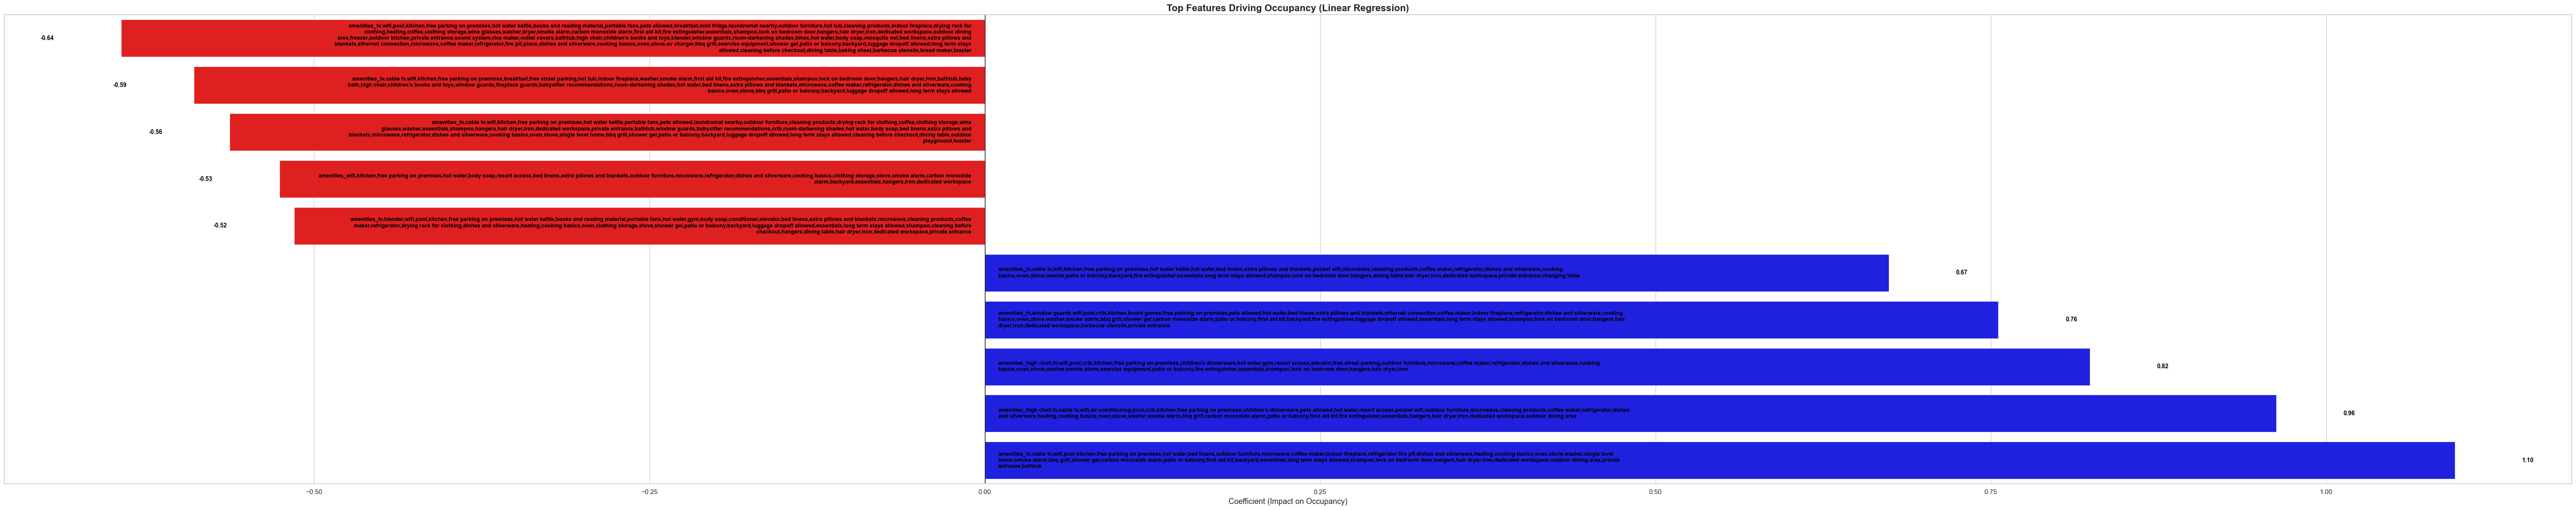

<Figure size 640x480 with 0 Axes>

In [ ]:
import textwrap

# ================= Safer Feature Name Extractor =================
def get_feature_names(preprocessor, input_features):
    output_names = []
    for name, trans, cols in preprocessor.transformers_:
        if trans == 'drop':
            continue
        # Handle Pipeline: use last step
        if isinstance(trans, Pipeline):
            trans = trans.steps[-1][1]

        if hasattr(trans, "get_feature_names_out"):
            output_names.extend(trans.get_feature_names_out(cols))
        else:
            # Fallback: just use original column names
            output_names.extend(cols if isinstance(cols, list) else [cols])
    return output_names


# ================= Train Final Linear Regression =================
final_lr = Pipeline([
    ('preprocessor', preprocessor_occ),
    ('regressor', LinearRegression())
])
final_lr.fit(X, y)

# ================= Extract Feature Names =================
feature_names = get_feature_names(final_lr.named_steps['preprocessor'], X.columns)

# Collect coefficients
coefs = final_lr.named_steps['regressor'].coef_
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})

# Intercept
intercept = final_lr.named_steps['regressor'].intercept_
print(f"Intercept: {intercept:.4f}")

# ================= Top Positive & Negative =================
top_pos = coef_df.sort_values(by="Coefficient", ascending=False).head()
top_neg = coef_df.sort_values(by="Coefficient", ascending=True).head()
top_features = pd.concat([top_pos, top_neg])

# ================= Wrap Feature Names =================
def wrap_labels(labels, width=250):
    return ['\n'.join(textwrap.wrap(l, width)) for l in labels]

# Sort features by coefficient
top_features_sorted = top_features.sort_values("Coefficient").copy()

# Apply wrapping to feature names
top_features_sorted["Feature"] = wrap_labels(top_features_sorted["Feature"], width=250)

# ================= Plot =================
plt.figure(figsize=(60, 12))

# Define palette
palette = top_features_sorted["Coefficient"].apply(lambda x: "red" if x < 0 else "blue").tolist()

ax = sns.barplot(
    data=top_features_sorted,
    x="Coefficient",
    y="Feature",
    palette=palette
)

plt.axvline(0, color="black", linewidth=1)

# --- HIDE THE DEFAULT Y-AXIS LABELS ---
plt.yticks([], [])
plt.ylabel("") # Remove the "Feature" label as it's no longer needed

# Loop through each bar to add custom text
for i, (coef, feature) in enumerate(zip(top_features_sorted["Coefficient"], top_features_sorted["Feature"])):
    
    # --- 1. Add the feature name INSIDE the bar ---
    # Position is slightly offset from zero
    x_pos = 0.01 if coef > 0 else -0.01
    ha_align = 'left' if coef > 0 else 'right'
    
    ax.text(
        x_pos, 
        i, 
        feature, # This is the feature name string
        color="black",
        va="center",
        ha=ha_align,
        fontsize=9,
        fontweight="bold"
    )
    
    # --- 2. Add the coefficient value OUTSIDE the bar  ---
    ax.text(
        coef + (0.05 if coef > 0 else -0.05),
        i,
        f"{coef:.2f}",
        color="black",
        va="center",
        ha="left" if coef > 0 else "right",
        fontsize=10,
        fontweight="bold"
    )

plt.title("Top Features Driving Occupancy (Linear Regression)", fontsize=16, fontweight="bold")
plt.xlabel("Coefficient (Impact on Occupancy)", fontsize=13)
plt.tight_layout()
plt.show()

plt.savefig("./images/top_features_driving_occupancy", format="jpeg", dpi=300)

**Next Steps**
- Save the final pipeline, which includes the preprocessor and linear regression model, for production use.
- Monitor model performance on future data to ensure continued reliability and generalization.

## **Saving the Occupancy Model**
Use joblib to serialize the complete pipeline, which includes both the preprocessing steps and the Linear regression model.

In [ ]:
#save the pipeline
joblib.dump(final_lr, "final_linear_regression.pkl")

print("✅ Final Linear Regression Pipeline saved successfully!")


✅ Final Linear Regression Pipeline saved successfully!


# 5.0 Deployment
## 5.1 Combined Streamlit App (app.py)
The app will let users choose between predicting price or occupancy, enter inputs and views results and feature importance for both. 

In [121]:
# =========================page configurations ==================
st.set_page_config(
    page_title = "Nairobi AirBnB Insights Predictor",
    page_icon = "🏨",
    layout = "centered"
)

st.title ("🏨 Nairobi AirBnB Insights Predictor")
st.write(
    "Choose between predicting Occupancy or Price using trained models machine learning models. The app also shows the factors that most influence the prediction."
    )

# ===================Load models =============================
occupancy_model = joblib.load("final_linear_regression.pkl")
price_model = joblib.load("xgb_tuned_price_pipeline.pkl")

if not occupancy_model or price_model:
    st.stop


# ======================== User Choice ========================
st.sidebar.header("Step 1: Choose the Prediction Type")
option = st.sidebar.radio("Select Model:", ["Occupancy", "Price"])

# select the right model and label
model, label = (occupancy_model, "Occupancy") if option == "Occupancy" else (price_model, "Price")

# =================== User Input ======================
st.sidebar.header("Step 2: Enter the Feature Values")

st.header(f"Enter Feature Values for {label} Prediction")

feature_names = model.named_steps["preprocessor"].feature_names_in_
user_input = {}
for col in feature_names:
    user_input[col] = st.number_input(f"{col}", value=0.0)

input_df = pd.DataFrame([user_input])

# ================= Prediction =================
if st.button(f"🔮 Predict {label}"):
    prediction = model.predict(input_df)[0]
    st.success(f"Predicted {label}: **{prediction:.2f}**")

    # ================= Feature Importance =================
    st.header(f"📊 Top Features Driving {label}")

    def get_feature_names(preprocessor, input_features):
        output_names = []
        for name, trans, cols in preprocessor.transformers_:
            if trans == 'drop':
                continue
            if hasattr(trans, "get_feature_names_out"):
                try:
                    output_names.extend(trans.get_feature_names_out(cols))
                except:
                    output_names.extend(trans.get_feature_names_out())
            else:
                output_names.extend(cols if isinstance(cols, list) else [cols])
        return output_names

    feature_labels = get_feature_names(model.named_steps['preprocessor'], feature_names)
    coefs = model.named_steps['regressor'].coef_

    coef_df = pd.DataFrame({
        "Feature": feature_labels,
        "Coefficient": coefs
    })

    top_pos = coef_df.sort_values(by="Coefficient", ascending=False).head(3)
    top_neg = coef_df.sort_values(by="Coefficient", ascending=True).head(3)
    top_features = pd.concat([top_pos, top_neg]).sort_values("Coefficient")

    def wrap_labels(labels, width=40):
        return ['\n'.join(textwrap.wrap(l, width)) for l in labels]

    top_features["Feature"] = wrap_labels(top_features["Feature"], width=40)

    fig, ax = plt.subplots(figsize=(8, 5))
    palette = top_features["Coefficient"].apply(lambda x: "red" if x < 0 else "blue").tolist()

    sns.barplot(
        data=top_features,
        x="Coefficient",
        y="Feature",
        palette=palette,
        ax=ax
    )

    ax.axvline(0, color="black", linewidth=1)
    ax.set_title(f"Top Features Driving {label}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Coefficient (Impact)")
    ax.set_ylabel("Feature")

    for i, (coef, feature) in enumerate(zip(top_features["Coefficient"], top_features["Feature"])):
        ax.text(
            coef + (0.05 if coef > 0 else -0.05),
            i,
            f"{coef:.2f}",
            color="black",
            va="center",
            ha="left" if coef > 0 else "right",
            fontsize=9,
            fontweight="bold"
        )

    st.pyplot(fig)


2025-10-04 17:23:55.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 17:23:55.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 17:23:55.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 17:23:55.398 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 17:23:55.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 17:23:55.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 17:23:55.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 17:23:55.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar